Based on the use of the Fitness, predict the number of visitors to the Fitness, taking into account the influence of 
1.    Seasons
2.    Holidays
3.    The day of the week
4.    Gender
5.    Educational institution (Hanze vs. UG)
6.    Exam periods for the UG students.

# Install Library

In [8]:
#%pip install pandas matplotlib seaborn statsmodels tensorflow

# Read CSV files

In [9]:
#import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import os
import glob
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline

In [10]:
#cardholders
cardholderPath = r"./Cardholders" 

#get all CSV files in the folder
cardholderCSV = glob.glob(os.path.join(cardholderPath, "*.csv"))

#create empty list
dfs = []

# loop over the list of csv files
for f in cardholderCSV:

#	#read the csv file
	df = pd.read_csv(f)
	print(df.shape[0])
	dfs.append(df)

print(dfs)

#concat all csv into one dataframe
cardholderDF = pd.concat(dfs)
cardholderDF.columns = ["client_id", "male", "female", "card_type"]

# print the content
print('Cardholders:')
display(cardholderDF.head())
print(cardholderDF.info())
print(cardholderDF.describe())


13952
16523
984
1371
[       Klant nr Geslacht Man Geslacht vrouw         Omschrijving
0        206602          NaN          Vrouw  ACLO Card 2020-2021
1        220965          NaN          Vrouw  ACLO Card 2020-2021
2        221004          Man            NaN  ACLO Card 2020-2021
3        200011          Man            NaN  ACLO Card 2020-2021
4        187611          Man            NaN  ACLO Card 2020-2021
...         ...          ...            ...                  ...
13947    228038          Man            NaN  ACLO Card 2020-2021
13948    223099          NaN          Vrouw  ACLO Card 2020-2021
13949    207190          NaN          Vrouw  ACLO Card 2020-2021
13950    227282          NaN          Vrouw  ACLO Card 2020-2021
13951    210613          NaN          Vrouw  ACLO Card 2020-2021

[13952 rows x 4 columns],        Klant nr Geslacht Man Geslacht vrouw         Omschrijving
0        179077          Man            NaN  ACLO Card 2021-2022
1        186113          Man            N

,client_id,male,female,card_type
0,206602,NaN,Vrouw,ACLO Card 2020-2021
1,220965,NaN,Vrouw,ACLO Card 2020-2021
2,221004,Man,NaN,ACLO Card 2020-2021
3,200011,Man,NaN,ACLO Card 2020-2021
4,187611,Man,NaN,ACLO Card 2020-2021


<class 'pandas.core.frame.DataFrame'>
Index: 32830 entries, 0 to 1370
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   client_id  32830 non-null  int64 
 1   male       14903 non-null  object
 2   female     17119 non-null  object
 3   card_type  32830 non-null  object
dtypes: int64(1), object(3)
memory usage: 1.3+ MB
None
           client_id
count   32830.000000
mean   212305.477490
std     19069.354786
min     11117.000000
25%    203387.000000
50%    217945.000000
75%    225501.000000
max    235614.000000


In [11]:
#checkin times
checkinPath = r"./Check-in times"

#get all CSV files in the folder
checkinCSV = glob.glob(os.path.join(checkinPath, "*.csv"))

#create empty list
dfs = []

#loop over the list of csv files
for f in checkinCSV:

	#read the csv file
	df = pd.read_csv(f)
	#print(df.shape[0])
	dfs.append(df)

#concat all csv into one dataframe
checkinDF = pd.concat(dfs, ignore_index=True)

#print the content
print('Checkin Times:')
display(checkinDF.head())

#merge two Lid id together
print(checkinDF.info())
checkinDF.columns = ["client_id", "institution", "gender", "card_type", "checkin_time", "extra"]
checkinDF["institution"] = checkinDF["institution"].fillna(checkinDF["extra"])
checkinDF.drop(["extra"], axis=1, inplace=True)
checkinDF.reset_index(drop=True)

#print the content
print('After Removing Duplicated Columns:')
display(checkinDF.head())
print(checkinDF.info())
print(checkinDF.describe())

Checkin Times:


,Klant nr,Lid id,Geslacht,Abo bezoek,Incheckdatum,Lid id
0,168236,Medewerker RUG,M,Fitness Card 2016-2017,2017-08-01 12:49:10,NaN
1,132339,RUG,M,Fitness Card 2016-2017,2017-08-01 12:53:11,NaN
2,141170,RUG,M,Fitness Card 2016-2017,2017-08-01 12:53:34,NaN
3,141170,RUG,M,Fitness Card 2016-2017,2017-08-01 12:54:13,NaN
4,186817,RUG,M,Fitness Card 2016-2017,2017-08-01 13:00:58,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 380785 entries, 0 to 380784
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   Klant nr      380785 non-null  int64 
 1   Lid id        102827 non-null  object
 2   Geslacht      380785 non-null  object
 3   Abo bezoek    373011 non-null  object
 4   Incheckdatum  380785 non-null  object
 5   Lid id        253005 non-null  object
dtypes: int64(1), object(5)
memory usage: 17.4+ MB
None
After Removing Duplicated Columns:


,client_id,institution,gender,card_type,checkin_time
0,168236,Medewerker RUG,M,Fitness Card 2016-2017,2017-08-01 12:49:10
1,132339,RUG,M,Fitness Card 2016-2017,2017-08-01 12:53:11
2,141170,RUG,M,Fitness Card 2016-2017,2017-08-01 12:53:34
3,141170,RUG,M,Fitness Card 2016-2017,2017-08-01 12:54:13
4,186817,RUG,M,Fitness Card 2016-2017,2017-08-01 13:00:58


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 380785 entries, 0 to 380784
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   client_id     380785 non-null  int64 
 1   institution   355832 non-null  object
 2   gender        380785 non-null  object
 3   card_type     373011 non-null  object
 4   checkin_time  380785 non-null  object
dtypes: int64(1), object(4)
memory usage: 14.5+ MB
None
           client_id
count  380785.000000
mean   191590.238121
std     28360.215007
min        26.000000
25%    183541.000000
50%    196651.000000
75%    207474.000000
max    235293.000000


# EDA

## Card Holders

### Distribution by Gender

In [12]:
#gender
display(cardholderDF.head())

#combine gender column
cardholderDF["male"] = cardholderDF["male"].fillna(cardholderDF["female"])
display(cardholderDF.head())

,client_id,male,female,card_type
0,206602,NaN,Vrouw,ACLO Card 2020-2021
1,220965,NaN,Vrouw,ACLO Card 2020-2021
2,221004,Man,NaN,ACLO Card 2020-2021
3,200011,Man,NaN,ACLO Card 2020-2021
4,187611,Man,NaN,ACLO Card 2020-2021


,client_id,male,female,card_type
0,206602,Vrouw,Vrouw,ACLO Card 2020-2021
1,220965,Vrouw,Vrouw,ACLO Card 2020-2021
2,221004,Man,NaN,ACLO Card 2020-2021
3,200011,Man,NaN,ACLO Card 2020-2021
4,187611,Man,NaN,ACLO Card 2020-2021


In [13]:
#remove extra column
cardholderDF.drop(["female"], axis=1, inplace=True)

In [14]:
cardholderDF = cardholderDF.rename(columns={"male": "gender"}).reset_index(drop=True)
display(cardholderDF.head())

print(cardholderDF["gender"].value_counts(dropna=False))

,client_id,gender,card_type
0,206602,Vrouw,ACLO Card 2020-2021
1,220965,Vrouw,ACLO Card 2020-2021
2,221004,Man,ACLO Card 2020-2021
3,200011,Man,ACLO Card 2020-2021
4,187611,Man,ACLO Card 2020-2021


gender
Vrouw    17119
Man      14903
NaN        808
Name: count, dtype: int64


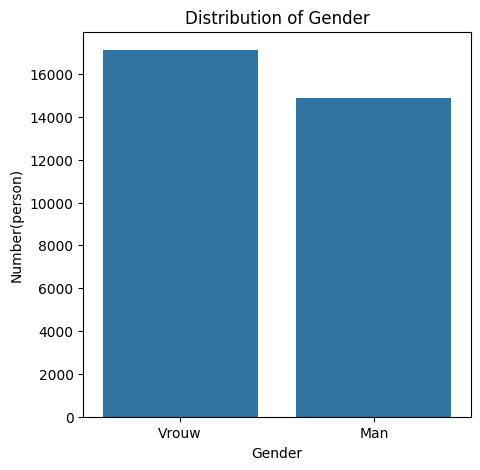

In [15]:
#Plot
plt.figure(figsize=(5,5))
plot = sns.countplot(data = cardholderDF, x = "gender")
plot.set_title("Distribution of Gender")
plot.set_xlabel("Gender")
plot.set_ylabel("Number(person)")


plt.show()

### Districution by type of card

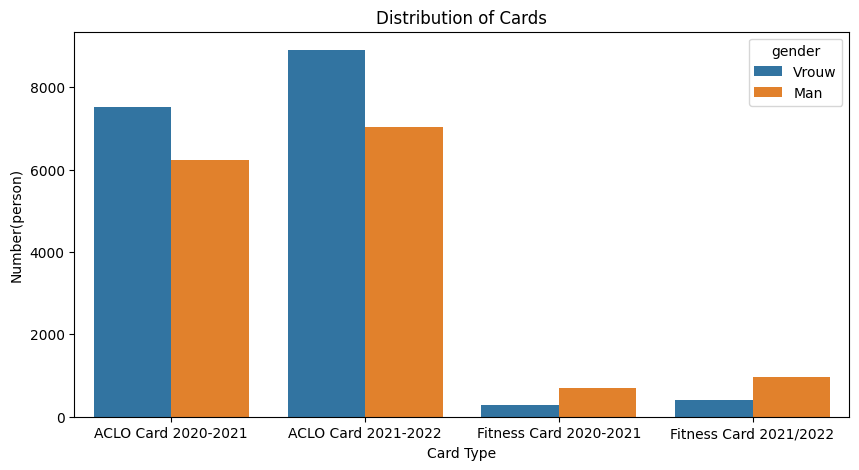

In [16]:
#type of cards
plt.figure(figsize=(10,5))
plot = sns.countplot(data = cardholderDF, x = "card_type", hue = "gender")
plot.set_title("Distribution of Cards")
plot.set_xlabel("Card Type")
plot.set_ylabel("Number(person)")

plt.show()

## Check In Times

### Fitness Usage by Education Institute

In [17]:
#check in times by education institute
print(checkinDF["institution"].unique())

['Medewerker RUG      ' 'RUG       ' nan 'Hanze       ' 'Hanze      '
 '         ' ' ' 'GORM' 'CRUGET' '     ' 'WIWI' 'GEEJ' '       ' 'ETGE'
 'DROK' 'OLTI' 'Medewerker RUGORUGHanze' '   ' 'WITF' '  ' '      ' 'JEVA'
 'VALE' 'UIWI' 'VWIL' 'Hanze ' '    ' 'DUJMedewerker RUG' 'KAJA'
 'RUGCHanzeHanze' 'MEAD' '        ' 'RORA' 'Medewerker RUGARN' 'JEEU'
 'Medewerker RUG/Hanze        ' 'Medewerker RUG/Hanze          '
 'Medewerker RUG/Hanze           ' 'RUG           '
 'Medewerker RUG/Hanze       ' 'RUG             ' 'Hanze            '
 'RUG          ' 'RUG            ' 'Medewerker RUG/Hanze         '
 'Hanze              ' 'Hanze        ' 'Hanze             '
 'Hanze                ' 'Hanze         ' 'Hanze               '
 'Medewerker RUG/Hanze             ' 'RUG              '
 'Hanze           ' 'Hanze          ' 'RUG                '
 'RUG               ' 'Medewerker RUG/Hanze              '
 'Medewerker RUG/Hanze            ' 'RUG                 ' 'RUG         '
 'RUG        ' 'Han

In [18]:
#clean data
checkinDF["institution"] = checkinDF["institution"].str.strip()
checkinDF.dropna(subset=["institution"], inplace = True)
print(checkinDF["institution"].unique())

['Medewerker RUG' 'RUG' 'Hanze' '' 'GORM' 'CRUGET' 'WIWI' 'GEEJ' 'ETGE'
 'DROK' 'OLTI' 'Medewerker RUGORUGHanze' 'WITF' 'JEVA' 'VALE' 'UIWI'
 'VWIL' 'DUJMedewerker RUG' 'KAJA' 'RUGCHanzeHanze' 'MEAD' 'RORA'
 'Medewerker RUGARN' 'JEEU' 'Medewerker RUG/Hanze'
 'MedewerkerRUG RUG/HanzeanzeARN' 'DUJMedewerkerRUG RUG/Hanzeanze' 'BNAN'
 'KILI' 'JENRUG' 'BONI' 'HanzeOHanzeO' 'VEHanzeW' 'VRJO' 'RUGAL_dili'
 'MORN' 'A.KoRUGter@rug.nl' 'TARI' 'Medewerkers RUG/Hanze'
 '- -        :  :' '-  -        :  :' 'DUJMedewerkers RUG/Hanze'
 '-1-1 00  00:00:00' 'Medewerkers RUG/HanzeARN' 'WACHanze'
 '-1-1900  00:00:00' 'KLEB' 'AJAA' 'RUGMEL' 'KRJN'
 'Medewerkers RUG/HanzeRWB' 'waya' 'DARA' 'CAWO'
 'ROBMedewerkers RUG/Hanze' 'ROBMedewerker RUG/Hanze'
 'DUJMedewerker RUG/Hanze' 'HanzeEMC' 'MEJJ' '-  -2       :  :'
 'Medewerker RUG/Hanze ARN' 'WERUGW' 'LEFI' 'KLMO' 'NAAU'
 'Medewerker RUG/Hanze OOM' 'Medewerker RUG/Hanze ELO' 'BORUGI' 'HanzeELE'
 'KAFA']


After confirming with the instructor, Data with values like MOOM, AJAA are actually the teacher's IDs from the schools. Hence, I decided to catogorize these data as "Medewerkers RUG/Hanze"

In [19]:
#remove unnecessary and find out all workers
wrongMask = ~checkinDF["institution"].str.contains("_|-|@", na=False)
workerMask = (~checkinDF["institution"].isin(["RUG", "Hanze"])) & (
    (checkinDF["institution"].str.len() == 4) | (checkinDF["institution"].str.contains("Medewerker|Hanze|RUG"))
)

checkinDF = checkinDF[wrongMask]

workerDF = checkinDF[workerMask]

instituteCount = workerDF["institution"].value_counts()
print(instituteCount.to_string())

institution
Medewerker RUG/Hanze              14848
Medewerker RUG                     9552
Medewerkers RUG/Hanze              9095
WIWI                                337
VWIL                                286
BONI                                231
ETGE                                217
GEEJ                                190
UIWI                                171
WITF                                164
RORA                                140
MEAD                                133
MORN                                 81
OLTI                                 63
DUJMedewerkers RUG/Hanze             60
DUJMedewerker RUG/Hanze              59
DROK                                 54
KILI                                 52
LEFI                                 47
HanzeEMC                             44
Medewerkers RUG/HanzeARN             43
CAWO                                 42
WACHanze                             37
KRJN                                 37
DUJMedewerker RUG           

C:\Users\watas\AppData\Local\Temp\ipykernel_19512\3147958940.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  workerDF = checkinDF[workerMask]


In [20]:
#make all workers into category Medewerker
checkinDF.loc[workerMask, "institution"] = "Medewerker RUG/Hanze"
print(checkinDF["institution"].unique())
print(checkinDF["institution"].value_counts(dropna=False))

['Medewerker RUG/Hanze' 'RUG' 'Hanze' '']
institution
RUG                     225749
Hanze                    84407
Medewerker RUG/Hanze     36428
                          6431
Name: count, dtype: int64


In [21]:
#remove the annoying ''
checkinDF["institution"].replace('', np.nan, inplace = True)
checkinDF.dropna(subset=["institution"], inplace = True)
print(checkinDF["institution"].value_counts(dropna=False))

institution
RUG                     225749
Hanze                    84407
Medewerker RUG/Hanze     36428
Name: count, dtype: int64


C:\Users\watas\AppData\Local\Temp\ipykernel_19512\3704752546.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  checkinDF["institution"].replace('', np.nan, inplace = True)


In [22]:
probInstitute = checkinDF["institution"].value_counts() / checkinDF["institution"].value_counts().sum() * 100
probInstitute = pd.DataFrame(probInstitute)
probInstitute.columns = ["percentage"]
print(probInstitute)

                      percentage
institution                     
RUG                    65.135436
Hanze                  24.353981
Medewerker RUG/Hanze   10.510583


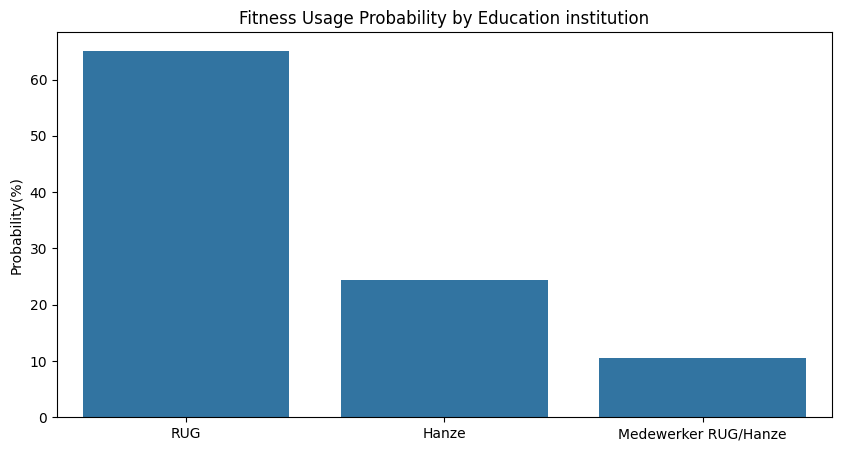

In [23]:
#Among all fitness usage history, the usage probability by education institution
plt.figure(figsize=(10,5))
plot = sns.barplot(data = probInstitute, x = probInstitute.index, y = "percentage")
plot.set_title("Fitness Usage Probability by Education institution")
plot.set_xlabel("")
plot.set_ylabel("Probability(%)")

plt.show()

### Fitness Usage by Gender

In [24]:
#check in times by gender

#remove fout(error) data
print(checkinDF["gender"].value_counts(dropna=False))
foutMask = checkinDF["gender"] == "fout"
checkinDF = checkinDF[~foutMask]  

print(f"After cleaning {checkinDF['gender'].value_counts(dropna=False)}")

gender
M       266864
V        67750
fout     11970
Name: count, dtype: int64
After cleaning gender
M    266864
V     67750
Name: count, dtype: int64


In [25]:
probGender = pd.DataFrame(checkinDF["gender"].value_counts() / checkinDF["gender"].value_counts().sum() * 100)
probGender.columns = ["percentage"]
display(probGender)

,percentage
gender,
M,79.75279
V,20.24721


C:\Users\watas\AppData\Local\Temp\ipykernel_19512\242538612.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plot.set_xticklabels(["Male", "Female"])


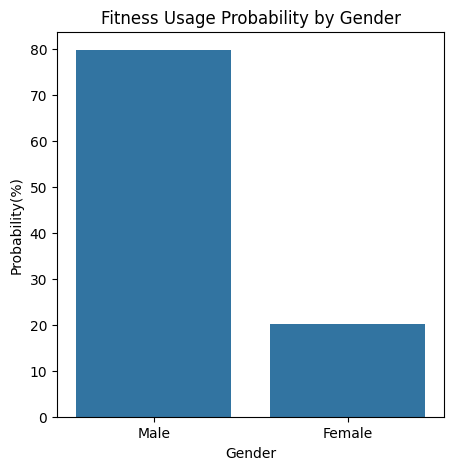

In [26]:
#among all fitness usage history, the usage probability by gender
plt.figure(figsize=(5,5))
plot = sns.barplot(data = probGender, x = probGender.index, y = "percentage")
plot.set_title("Fitness Usage Probability by Gender")
plot.set_xlabel("Gender")
plot.set_ylabel("Probability(%)")

plot.set_xticklabels(["Male", "Female"])

plt.show()

In [27]:
#among all fitness usage history, the usage probability by gender of each institution
probEduGender = checkinDF.groupby(["institution", "gender"]).size().reset_index(name = "frequency")
probEduGender["percentage"] = probEduGender["frequency"] / probEduGender["frequency"].sum() * 100
display(probEduGender)

,institution,gender,frequency,percentage
0,Hanze,M,62627,18.716192
1,Hanze,V,16390,4.898181
2,Medewerker RUG/Hanze,M,30208,9.027716
3,Medewerker RUG/Hanze,V,5861,1.751570
4,RUG,M,174029,52.008882
5,RUG,V,45499,13.597459


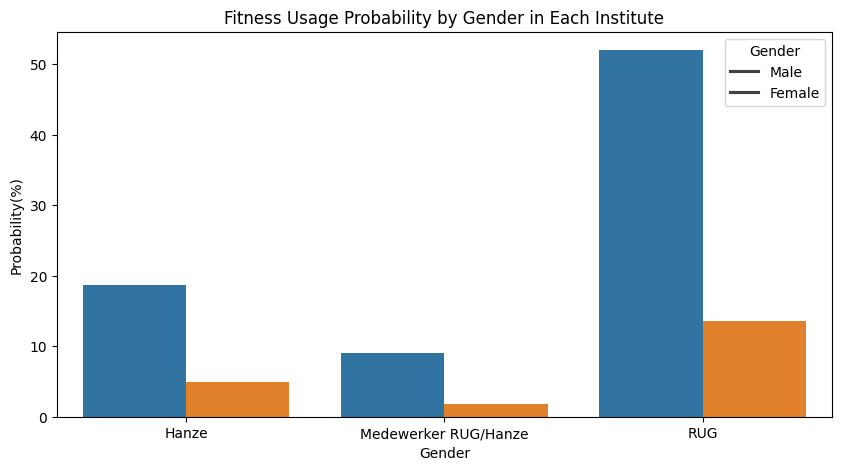

In [28]:
plt.figure(figsize=(10,5))
cEduGender = sns.barplot(data = probEduGender, x = "institution", y = "percentage", hue = "gender")
cEduGender.set_title("Fitness Usage Probability by Gender in Each Institute")
cEduGender.set_xlabel("Gender")
cEduGender.set_ylabel("Probability(%)")
cEduGender.legend(title = "Gender", labels = ["Male", "Female"])

plt.show()

### Fitness Usage by Card Type

In [29]:
numCard = checkinDF.groupby("card_type").size().reset_index(name = "usage")
display(numCard)

,card_type,usage
0,ACLO 1st semester Card 2021/2022,363
1,ACLO Card 2021-2022,3278
2,ACLO free Card 2021/2022,41
3,Fitness 'krachtwacht' 2018-2019,1737
4,Fitness 1st semester 2020-2021,1100
5,Fitness 1st semester 2021/2022,1759
6,Fitness 1st semester Card 18-19,3568
7,Fitness 1st semester Card 19-20,6278
8,Fitness 2nd semester 2020-2021,17
9,Fitness 2nd semester Card 18-19,11132


In [30]:
#fitness usage by each card type
numCard = numCard[numCard["card_type"].str.contains("ACLO Card|Fitness Card")]
display(numCard)

,card_type,usage
1,ACLO Card 2021-2022,3278
11,Fitness Card 2016-2017,2756
12,Fitness Card 2017-2018,80268
13,Fitness Card 2018-2019,71633
14,Fitness Card 2019-2020,64779
15,Fitness Card 2020-2021,14384
16,Fitness Card 2021/2022,11423


In [31]:
#total amount of card distributed
memberCard = cardholderDF.groupby("card_type").size().reset_index(name = "distributed")
display(memberCard)

,card_type,distributed
0,ACLO Card 2020-2021,13952
1,ACLO Card 2021-2022,16523
2,Fitness Card 2020-2021,984
3,Fitness Card 2021/2022,1371


In [32]:
allCard = memberCard.merge(numCard, how = "outer", on = "card_type")
allCard = allCard.fillna(0)

display(allCard)

,card_type,distributed,usage
0,ACLO Card 2020-2021,13952.0,0.0
1,ACLO Card 2021-2022,16523.0,3278.0
2,Fitness Card 2016-2017,0.0,2756.0
3,Fitness Card 2017-2018,0.0,80268.0
4,Fitness Card 2018-2019,0.0,71633.0
5,Fitness Card 2019-2020,0.0,64779.0
6,Fitness Card 2020-2021,984.0,14384.0
7,Fitness Card 2021/2022,1371.0,11423.0


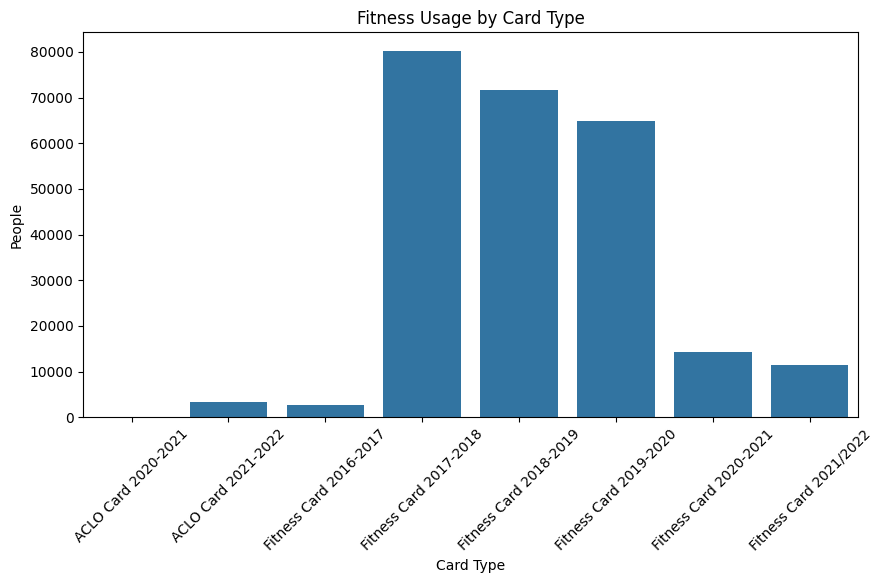

In [33]:
#plot
plt.figure(figsize=(10,5))
plot = sns.barplot(data = allCard, x = "card_type", y = "usage")
plot.set_title("Fitness Usage by Card Type")
plot.set_xlabel("Card Type")
plot.set_ylabel("People")
plt.xticks(rotation=45) #increase readability


plt.show()

After checking the overall number of the fitness usage, I would like to know how many unique users are using the fitness service by the card types.

In [34]:
#number of unique member for fitness usage by each card type
uniqueCardUsers = checkinDF.groupby("card_type")["client_id"].nunique().reset_index(name = "unique")
uniqueCardUsers = uniqueCardUsers[uniqueCardUsers["card_type"].str.contains("ACLO Card|Fitness Card")]

display(uniqueCardUsers)

,card_type,unique
1,ACLO Card 2021-2022,898
11,Fitness Card 2016-2017,431
12,Fitness Card 2017-2018,1556
13,Fitness Card 2018-2019,1521
14,Fitness Card 2019-2020,1584
15,Fitness Card 2020-2021,822
16,Fitness Card 2021/2022,1094


In [35]:
allCard = allCard.merge(uniqueCardUsers, how = "outer", on = "card_type")
allCard = allCard.fillna(0)

display(allCard)

,card_type,distributed,usage,unique
0,ACLO Card 2020-2021,13952.0,0.0,0.0
1,ACLO Card 2021-2022,16523.0,3278.0,898.0
2,Fitness Card 2016-2017,0.0,2756.0,431.0
3,Fitness Card 2017-2018,0.0,80268.0,1556.0
4,Fitness Card 2018-2019,0.0,71633.0,1521.0
5,Fitness Card 2019-2020,0.0,64779.0,1584.0
6,Fitness Card 2020-2021,984.0,14384.0,822.0
7,Fitness Card 2021/2022,1371.0,11423.0,1094.0


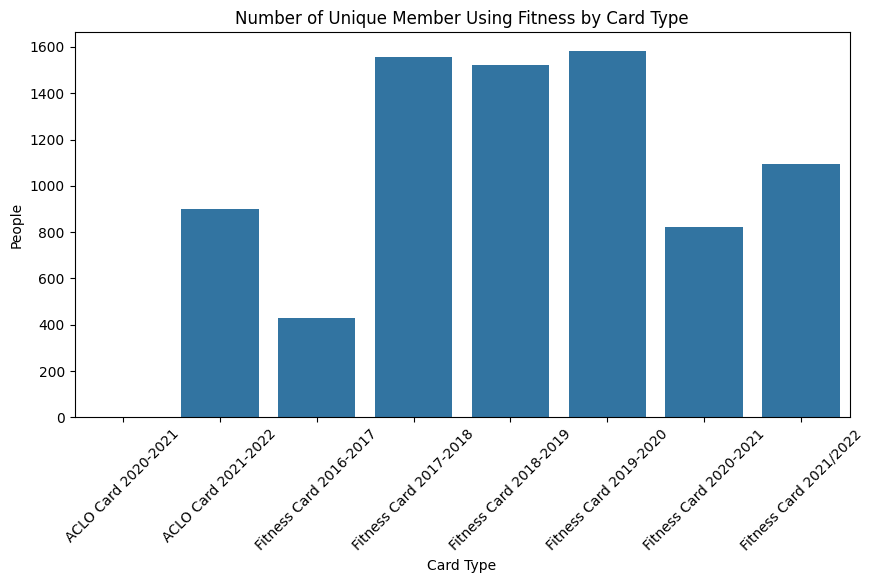

In [36]:
#among all card type, the number of unique member using fitness
plt.figure(figsize=(10,5))
plot = sns.barplot(data = allCard, x = "card_type", y = "unique")
plot.set_title("Number of Unique Member Using Fitness by Card Type")
plot.set_xlabel("Card Type")
plot.set_ylabel("People")
plt.xticks(rotation=45) #increase readability


plt.show()

As the previous Card Type distribution indicates, most people hold a regular ACLO card. 
So it might have the chance that the unique user of the regular card is higher due to its large distribution.

Hence, I decide to divide the number of unique users by the didtribution of the cards, to see the percentage of unique users instead of number.

However, since the distribution data is only 2020-2022, The following graph will only demenstrate the percentage of unique users between 2020-2022

In [37]:
allCard["unique_percentage"] = allCard.loc[allCard["distributed"] > 0, "unique"] / allCard["distributed"] * 100

display(allCard)

,card_type,distributed,usage,unique,unique_percentage
0,ACLO Card 2020-2021,13952.0,0.0,0.0,0.000000
1,ACLO Card 2021-2022,16523.0,3278.0,898.0,5.434848
2,Fitness Card 2016-2017,0.0,2756.0,431.0,NaN
3,Fitness Card 2017-2018,0.0,80268.0,1556.0,NaN
4,Fitness Card 2018-2019,0.0,71633.0,1521.0,NaN
5,Fitness Card 2019-2020,0.0,64779.0,1584.0,NaN
6,Fitness Card 2020-2021,984.0,14384.0,822.0,83.536585
7,Fitness Card 2021/2022,1371.0,11423.0,1094.0,79.795770


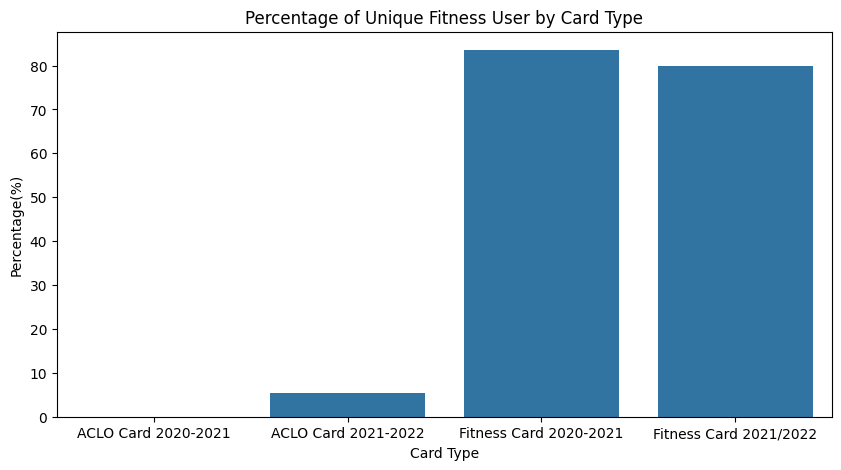

In [38]:
#among all card type, the fitness usage probability
plt.figure(figsize=(10,5))
plot = sns.barplot(data = allCard[~allCard["unique_percentage"].isna()], x = "card_type", y = "unique_percentage")
plot.set_title("Percentage of Unique Fitness User by Card Type")
plot.set_xlabel("Card Type")
plot.set_ylabel("Percentage(%)")


plt.show()

Finally, I want to check the average fitness usage of each user by the card types. To see if fitness cardholders tend to use more frequently.

In [39]:
allCard["per_member_usage"] = allCard["usage"] / allCard["unique"]

display(allCard)

,card_type,distributed,usage,unique,unique_percentage,per_member_usage
0,ACLO Card 2020-2021,13952.0,0.0,0.0,0.000000,NaN
1,ACLO Card 2021-2022,16523.0,3278.0,898.0,5.434848,3.650334
2,Fitness Card 2016-2017,0.0,2756.0,431.0,NaN,6.394432
3,Fitness Card 2017-2018,0.0,80268.0,1556.0,NaN,51.586118
4,Fitness Card 2018-2019,0.0,71633.0,1521.0,NaN,47.095989
5,Fitness Card 2019-2020,0.0,64779.0,1584.0,NaN,40.895833
6,Fitness Card 2020-2021,984.0,14384.0,822.0,83.536585,17.498783
7,Fitness Card 2021/2022,1371.0,11423.0,1094.0,79.795770,10.441499


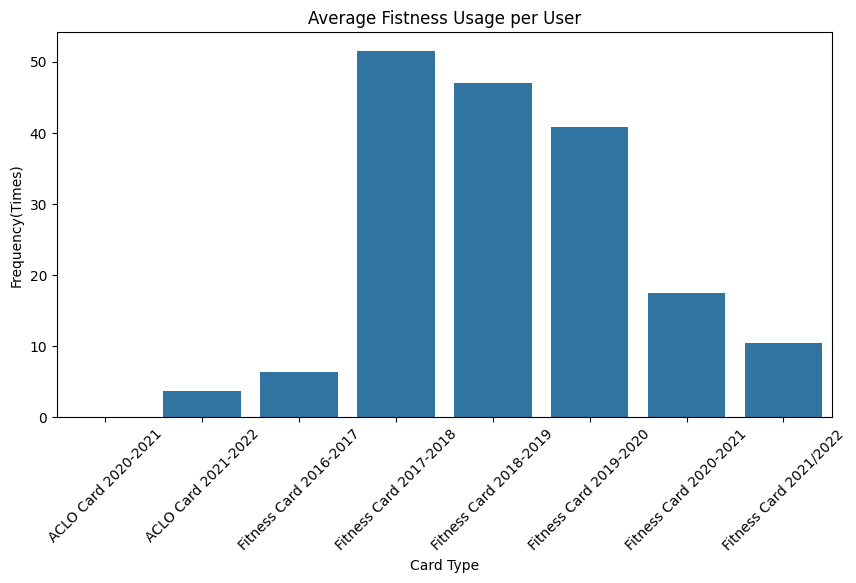

In [40]:
#among all card type, the average fitness usage frequency per user
plt.figure(figsize=(10,5))
plot = sns.barplot(data = allCard, x = "card_type", y = "per_member_usage")
plot.set_title("Average Fistness Usage per User")
plot.set_xlabel("Card Type")
plot.set_ylabel("Frequency(Times)")
plt.xticks(rotation=45) #increase readability


plt.show()

### Fitness Usage by Card Types and Education Institute

In this part, I would like to see the distribution of cardtypes by each institution and their relating fitness usage.

In [41]:
#among the users from all school, the number of unique fitness users
eduCard = checkinDF[checkinDF["card_type"].str.contains("ACLO Card|Fitness Card", na = False)].\
    groupby(["institution", "card_type"])["client_id"].nunique().reset_index(name = "unique")

display(eduCard)

,institution,card_type,unique
0,Hanze,ACLO Card 2021-2022,224
1,Hanze,Fitness Card 2016-2017,83
2,Hanze,Fitness Card 2017-2018,344
3,Hanze,Fitness Card 2018-2019,363
4,Hanze,Fitness Card 2019-2020,403
5,Hanze,Fitness Card 2020-2021,214
6,Hanze,Fitness Card 2021/2022,311
7,Medewerker RUG/Hanze,Fitness Card 2016-2017,87
8,Medewerker RUG/Hanze,Fitness Card 2017-2018,165
9,Medewerker RUG/Hanze,Fitness Card 2018-2019,20


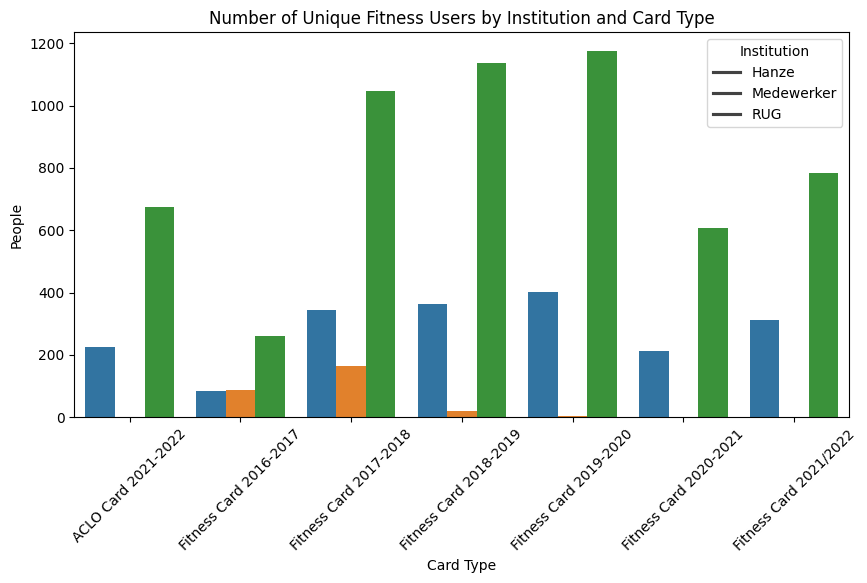

In [42]:
#plot
plt.figure(figsize=(10,5))
plot = sns.barplot(data = eduCard, x="card_type", y="unique", hue="institution")
plot.set_title("Number of Unique Fitness Users by Institution and Card Type")
plot.set_xlabel("Card Type")
plot.set_ylabel("People")
plot.legend(title = "Institution", labels = ["Hanze", "Medewerker", "RUG"])
plt.xticks(rotation=45) #increase readability


plt.show()

In [43]:
#among the users of the schools, the how often they use the fitness service
numEduCard = checkinDF[checkinDF["card_type"].str.contains("ACLO Card|Fitness Card", na = False)].\
    groupby(["institution", "card_type"])["client_id"].size().reset_index(name = "usage")

display(numEduCard)

,institution,card_type,usage
0,Hanze,ACLO Card 2021-2022,810
1,Hanze,Fitness Card 2016-2017,630
2,Hanze,Fitness Card 2017-2018,19008
3,Hanze,Fitness Card 2018-2019,17033
4,Hanze,Fitness Card 2019-2020,16218
5,Hanze,Fitness Card 2020-2021,3600
6,Hanze,Fitness Card 2021/2022,2868
7,Medewerker RUG/Hanze,Fitness Card 2016-2017,627
8,Medewerker RUG/Hanze,Fitness Card 2017-2018,7915
9,Medewerker RUG/Hanze,Fitness Card 2018-2019,1070


As the previous distribution graph indicates, RUG has most unique users, so there might have the chance that the fitness usage are higher due to the large number of users.

Hence, I decide to divide the frequency of fitness usage with the unique users of each school, to see the average usage per user.

In [44]:
allEduCard = eduCard.merge(numEduCard, on = ["institution", "card_type"])

display(allEduCard)

,institution,card_type,unique,usage
0,Hanze,ACLO Card 2021-2022,224,810
1,Hanze,Fitness Card 2016-2017,83,630
2,Hanze,Fitness Card 2017-2018,344,19008
3,Hanze,Fitness Card 2018-2019,363,17033
4,Hanze,Fitness Card 2019-2020,403,16218
5,Hanze,Fitness Card 2020-2021,214,3600
6,Hanze,Fitness Card 2021/2022,311,2868
7,Medewerker RUG/Hanze,Fitness Card 2016-2017,87,627
8,Medewerker RUG/Hanze,Fitness Card 2017-2018,165,7915
9,Medewerker RUG/Hanze,Fitness Card 2018-2019,20,1070


In [45]:
allEduCard["per_member_usage"] = allEduCard["usage"] / allEduCard["unique"]

display(allEduCard)

,institution,card_type,unique,usage,per_member_usage
0,Hanze,ACLO Card 2021-2022,224,810,3.616071
1,Hanze,Fitness Card 2016-2017,83,630,7.590361
2,Hanze,Fitness Card 2017-2018,344,19008,55.255814
3,Hanze,Fitness Card 2018-2019,363,17033,46.922865
4,Hanze,Fitness Card 2019-2020,403,16218,40.243176
5,Hanze,Fitness Card 2020-2021,214,3600,16.822430
6,Hanze,Fitness Card 2021/2022,311,2868,9.221865
7,Medewerker RUG/Hanze,Fitness Card 2016-2017,87,627,7.206897
8,Medewerker RUG/Hanze,Fitness Card 2017-2018,165,7915,47.969697
9,Medewerker RUG/Hanze,Fitness Card 2018-2019,20,1070,53.500000


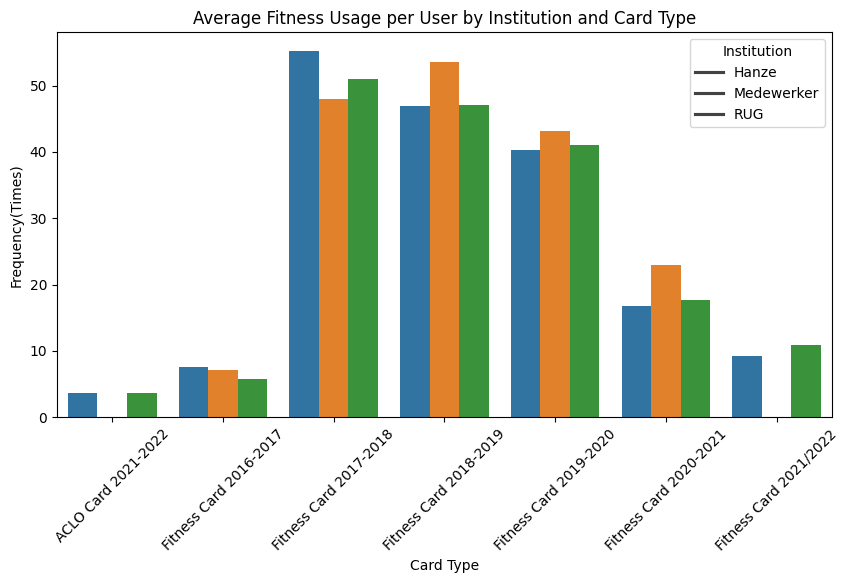

In [46]:
#plot
plt.figure(figsize=(10,5))
plot = sns.barplot(data = allEduCard, x="card_type", y="per_member_usage", hue="institution")
plot.set_title("Average Fitness Usage per User by Institution and Card Type")
plot.set_xlabel("Card Type")
plot.set_ylabel("Frequency(Times)")
plot.legend(title = "Institution", labels = ["Hanze", "Medewerker", "RUG"])
plt.xticks(rotation=45) #increase readability


plt.show()

### Fitness Usage by Month

In [47]:
#Check in times by month

print(type(checkinDF.loc[0, "checkin_time"]))

<class 'str'>


In [48]:
#make string time into datetime
checkinDF["checkin_time"] = pd.to_datetime(checkinDF["checkin_time"])

#fetch out year and month
checkinDF["year"] = checkinDF["checkin_time"].dt.year
checkinDF["month"] = checkinDF["checkin_time"].dt.month_name()

display(checkinDF.head())

,client_id,institution,gender,card_type,checkin_time,year,month
0,168236,Medewerker RUG/Hanze,M,Fitness Card 2016-2017,2017-08-01 12:49:10,2017,August
1,132339,RUG,M,Fitness Card 2016-2017,2017-08-01 12:53:11,2017,August
2,141170,RUG,M,Fitness Card 2016-2017,2017-08-01 12:53:34,2017,August
3,141170,RUG,M,Fitness Card 2016-2017,2017-08-01 12:54:13,2017,August
4,186817,RUG,M,Fitness Card 2016-2017,2017-08-01 13:00:58,2017,August


In [49]:
#count frequency of month by each year
numMonth = checkinDF.groupby(['year', 'month']).size().reset_index(name='usage')

display(numMonth)

,year,month,usage
0,2017,August,3513
1,2017,December,6963
2,2017,November,9541
3,2017,October,10652
4,2017,September,6920
5,2018,April,9009
6,2018,August,1956
7,2018,December,7116
8,2018,February,10474
9,2018,January,8033


In [50]:
# Define the correct order of months
monthSort = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]

# Convert "month_name" to categorical with ordered categories
numMonth["month"] = pd.Categorical(numMonth["month"], categories=monthSort, ordered=True)
display(numMonth)

,year,month,usage
0,2017,August,3513
1,2017,December,6963
2,2017,November,9541
3,2017,October,10652
4,2017,September,6920
5,2018,April,9009
6,2018,August,1956
7,2018,December,7116
8,2018,February,10474
9,2018,January,8033


In [51]:
#make month and year as the index and column of the table
medianMonth = numMonth.groupby("month")["usage"].median().reset_index(name = "median")

display(medianMonth)

C:\Users\watas\AppData\Local\Temp\ipykernel_19512\226077469.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  medianMonth = numMonth.groupby("month")["usage"].median().reset_index(name = "median")


,month,median
0,January,9833.0
1,February,10474.0
2,March,11237.0
3,April,9009.0
4,May,9635.0
5,June,6361.5
6,July,2961.5
7,August,2539.0
8,September,5664.0
9,October,10463.0


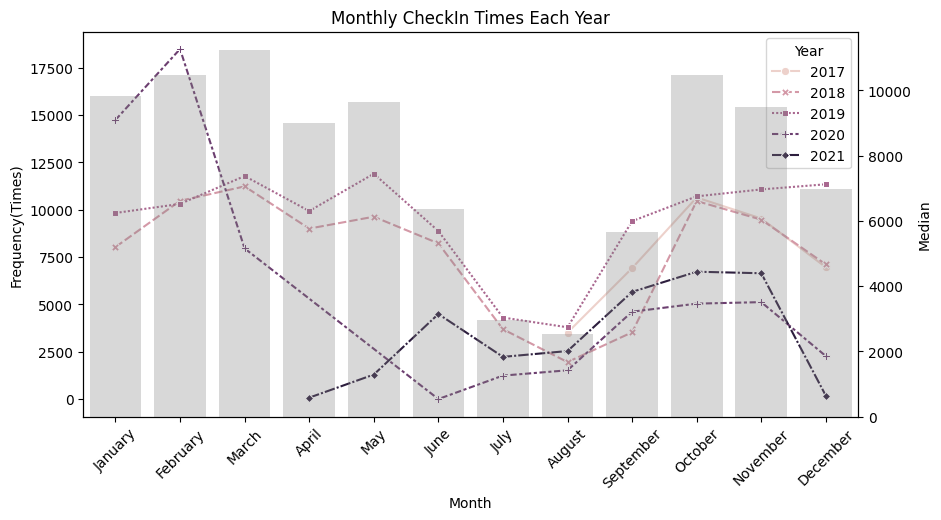

In [52]:
#seperate monthly checkin plot
fig, ax1 = plt.subplots(figsize=(10, 5))

#Lineplot
plot = sns.lineplot(data=numMonth, x="month", y="usage", hue="year", style="year", markers=True, ax=ax1)
plot.set_title("Monthly CheckIn Times Each Year")
plot.set_xlabel("Month")
plot.set_ylabel("Frequency(Times)")
plot.legend(title="Year")
plt.xticks(rotation=45) #increase readability

#Barchart for average chackin
ax2 = ax1.twinx()
statistic = sns.barplot(data=medianMonth, x="month", y="median", alpha=0.3, color='gray', ax=ax2)
statistic.set_ylabel("Median")

plt.show()

### Used Times by weekdays

In [53]:
#Check in times by weekdays

#Fetch weekdays
checkinDF["day"] = checkinDF["checkin_time"].dt.day_name()

display(checkinDF.head())

,client_id,institution,gender,card_type,checkin_time,year,month,day
0,168236,Medewerker RUG/Hanze,M,Fitness Card 2016-2017,2017-08-01 12:49:10,2017,August,Tuesday
1,132339,RUG,M,Fitness Card 2016-2017,2017-08-01 12:53:11,2017,August,Tuesday
2,141170,RUG,M,Fitness Card 2016-2017,2017-08-01 12:53:34,2017,August,Tuesday
3,141170,RUG,M,Fitness Card 2016-2017,2017-08-01 12:54:13,2017,August,Tuesday
4,186817,RUG,M,Fitness Card 2016-2017,2017-08-01 13:00:58,2017,August,Tuesday


In [54]:
#Count frequency of month by each year
numDay = checkinDF.groupby(['month', 'day']).size().reset_index(name='usage')


daySort = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
numDay["day"] = pd.Categorical(numDay["day"], categories=daySort, ordered=True)
numDay["month"] = pd.Categorical(numDay["month"], categories=monthSort, ordered=True)

display(numDay)

,month,day,usage
0,April,Friday,2136
1,April,Monday,4474
2,April,Saturday,1351
3,April,Sunday,1471
4,April,Thursday,2756
...,...,...,...
79,September,Saturday,2593
80,September,Sunday,2312
81,September,Thursday,4794
82,September,Tuesday,5261


In [55]:
display(numDay.groupby(["month", "day"])["usage"].describe())

C:\Users\watas\AppData\Local\Temp\ipykernel_19512\3832988764.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  display(numDay.groupby(["month", "day"])["usage"].describe())


count    mean  std     min     25%     50%     75%     max
month    day                                                                  
January  Monday       1.0  5729.0  NaN  5729.0  5729.0  5729.0  5729.0  5729.0
         Tuesday      1.0  5378.0  NaN  5378.0  5378.0  5378.0  5378.0  5378.0
         Wednesday    1.0  5836.0  NaN  5836.0  5836.0  5836.0  5836.0  5836.0
         Thursday     1.0  5053.0  NaN  5053.0  5053.0  5053.0  5053.0  5053.0
         Friday       1.0  4972.0  NaN  4972.0  4972.0  4972.0  4972.0  4972.0
...                   ...     ...  ...     ...     ...     ...     ...     ...
December Wednesday    1.0  4723.0  NaN  4723.0  4723.0  4723.0  4723.0  4723.0
         Thursday     1.0  4283.0  NaN  4283.0  4283.0  4283.0  4283.0  4283.0
         Friday       1.0  4145.0  NaN  4145.0  4145.0  4145.0  4145.0  4145.0
         Saturday     1.0  2170.0  NaN  2170.0  2170.0  2170.0  2170.0  2170.0
         Sunday       1.0  2464.0  NaN  2464.0  2464.0  2464.0  2464.0  2464.0

[84 rows x 8 columns]

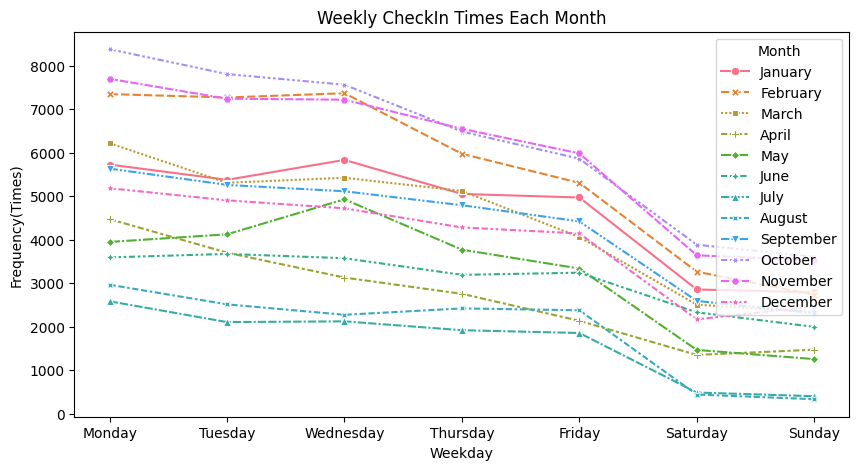

In [56]:
#Plot
plt.figure(figsize=(10,5))
plot = sns.lineplot(data=numDay, x="day", y="usage", hue="month", style="month", markers=True)
plot.set_title("Weekly CheckIn Times Each Month")
plot.set_xlabel("Weekday")
plot.set_ylabel("Frequency(Times)")
plt.legend(title="Month")


plt.show()

### Used TImes by Season

In [57]:
#Check in times by season
def getSeason(month):
    if not isinstance(month, str):
        month = month.strftime('%B')
        
    if month in ("December", "January", "February"):
        return "Winter"
    elif month in ("March", "April", "May"):
        return "Spring"
    elif month in ("June", "July", "August"):
        return "Summer"
    else:
        return "Fall"

In [58]:
checkinDF["season"] = checkinDF["month"].apply(getSeason)
display(checkinDF.head())

,client_id,institution,gender,card_type,checkin_time,year,month,day,season
0,168236,Medewerker RUG/Hanze,M,Fitness Card 2016-2017,2017-08-01 12:49:10,2017,August,Tuesday,Summer
1,132339,RUG,M,Fitness Card 2016-2017,2017-08-01 12:53:11,2017,August,Tuesday,Summer
2,141170,RUG,M,Fitness Card 2016-2017,2017-08-01 12:53:34,2017,August,Tuesday,Summer
3,141170,RUG,M,Fitness Card 2016-2017,2017-08-01 12:54:13,2017,August,Tuesday,Summer
4,186817,RUG,M,Fitness Card 2016-2017,2017-08-01 13:00:58,2017,August,Tuesday,Summer


In [59]:
#group season by year
numSeason = checkinDF.groupby(['year', 'season']).size().reset_index(name='usage')

seasonSort = ['Spring', 'Summer', 'Fall', 'Winter']
numSeason["season"] = pd.Categorical(numSeason["season"], categories=seasonSort, ordered=True)

display(numSeason)

,year,season,usage
0,2017,Fall,27113
1,2017,Summer,3513
2,2017,Winter,6963
3,2018,Fall,23471
4,2018,Spring,29881
5,2018,Summer,13876
6,2018,Winter,25623
7,2019,Fall,31191
8,2019,Spring,33625
9,2019,Summer,16982


In [60]:
display(numSeason.groupby(["year", "season"])["usage"].describe())

C:\Users\watas\AppData\Local\Temp\ipykernel_19512\338032277.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  display(numSeason.groupby(["year", "season"])["usage"].describe())


count     mean  std      min      25%      50%      75%      max
year season                                                                  
2017 Summer    1.0   3513.0  NaN   3513.0   3513.0   3513.0   3513.0   3513.0
     Fall      1.0  27113.0  NaN  27113.0  27113.0  27113.0  27113.0  27113.0
     Winter    1.0   6963.0  NaN   6963.0   6963.0   6963.0   6963.0   6963.0
2018 Spring    1.0  29881.0  NaN  29881.0  29881.0  29881.0  29881.0  29881.0
     Summer    1.0  13876.0  NaN  13876.0  13876.0  13876.0  13876.0  13876.0
     Fall      1.0  23471.0  NaN  23471.0  23471.0  23471.0  23471.0  23471.0
     Winter    1.0  25623.0  NaN  25623.0  25623.0  25623.0  25623.0  25623.0
2019 Spring    1.0  33625.0  NaN  33625.0  33625.0  33625.0  33625.0  33625.0
     Summer    1.0  16982.0  NaN  16982.0  16982.0  16982.0  16982.0  16982.0
     Fall      1.0  31191.0  NaN  31191.0  31191.0  31191.0  31191.0  31191.0
     Winter    1.0  31494.0  NaN  31494.0  31494.0  31494.0  31494.0  31494.0
2020 Spring    1.0   7960.0  NaN   7960.0   7960.0   7960.0   7960.0   7960.0
     Summer    1.0   2767.0  NaN   2767.0   2767.0   2767.0   2767.0   2767.0
     Fall      1.0  14785.0  NaN  14785.0  14785.0  14785.0  14785.0  14785.0
     Winter    1.0  35514.0  NaN  35514.0  35514.0  35514.0  35514.0  35514.0
2021 Spring    1.0   1372.0  NaN   1372.0   1372.0   1372.0   1372.0   1372.0
     Summer    1.0   9265.0  NaN   9265.0   9265.0   9265.0   9265.0   9265.0
     Fall      1.0  19043.0  NaN  19043.0  19043.0  19043.0  19043.0  19043.0
     Winter    1.0    176.0  NaN    176.0    176.0    176.0    176.0    176.0

In [61]:
#make month and year as the index and column of the table
medianSeason = numSeason.groupby("season")["usage"].median().reset_index(name = "median")

display(medianSeason)

C:\Users\watas\AppData\Local\Temp\ipykernel_19512\949435678.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  medianSeason = numSeason.groupby("season")["usage"].median().reset_index(name = "median")


,season,median
0,Spring,18920.5
1,Summer,9265.0
2,Fall,23471.0
3,Winter,25623.0


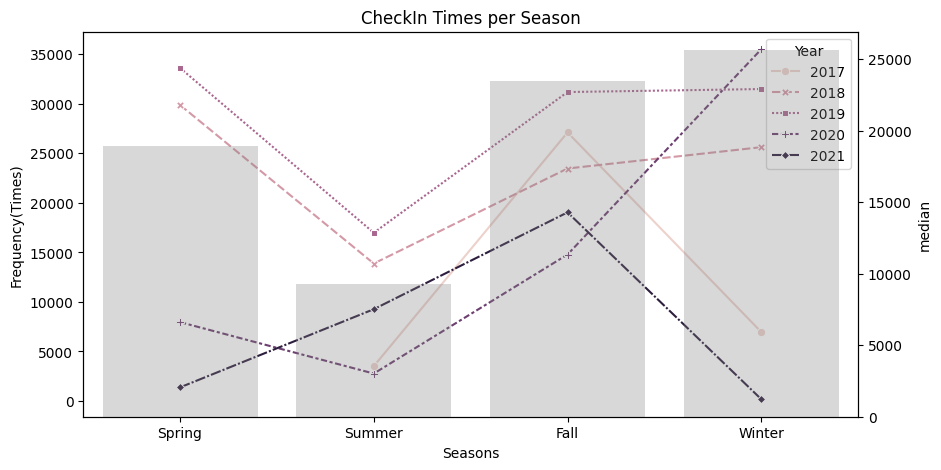

In [62]:
#seperated yearly season checkin plot
fig, ax1 = plt.subplots(figsize=(10, 5))

#Lineplot
plot = sns.lineplot(data=numSeason, x="season", y="usage", hue="year", style="year", markers=True, ax=ax1)
plot.set_title("CheckIn Times per Season")
plot.set_xlabel("Seasons")
plot.set_ylabel("Frequency(Times)")
plot.legend(title="Year")

#Barchart for average checkin
ax2 = ax1.twinx()
sns.barplot(x=medianSeason["season"], y=medianSeason["median"], alpha=0.3, color='gray', ax=ax2)

plt.show()

### Fitness Usage during Holiday

In [63]:
#check in time by holiday

#read calendar
calendar = pd.read_csv("./calendar.csv")
display(calendar.head())

,date,holiday,Exam,Lockdown
0,1/1/17,Christmas Break,0.0,0.0
1,1/2/17,Christmas Break,0.0,0.0
2,1/3/17,Christmas Break,0.0,0.0
3,1/4/17,Christmas Break,0.0,0.0
4,1/5/17,Christmas Break,0.0,0.0


In [64]:
print(type(calendar.loc[0, "date"]))

<class 'str'>


In [65]:
calendar["date"] = calendar["date"].apply(pd.to_datetime).apply(lambda x: x.date())
print(type(calendar.loc[0, "date"]))

<class 'datetime.date'>


In [66]:
#set date as index
calendar = calendar.set_index("date")
display(calendar.head())

,holiday,Exam,Lockdown
date,,,
2017-01-01,Christmas Break,0.0,0.0
2017-01-02,Christmas Break,0.0,0.0
2017-01-03,Christmas Break,0.0,0.0
2017-01-04,Christmas Break,0.0,0.0
2017-01-05,Christmas Break,0.0,0.0


In [67]:
numCalendar = calendar.groupby(["Lockdown", "holiday"]).size().reset_index(name='Frequency')
display(numCalendar)

,Lockdown,holiday,Frequency
0,0.0,Ascension Day,7
1,0.0,Christmas Break,86
2,0.0,Easter,20
3,0.0,Flexible Break,13
4,0.0,Kingsday,7
5,0.0,Liberation Day,7
6,0.0,Summer Vacation,326
7,0.0,Whit,12
8,1.0,Ascension Day,2
9,1.0,Christmas Break,26


In [68]:
def getHoliday(datetime):
    date = datetime.date()
    return calendar.loc[date, "holiday"]

In [69]:
#return holiday of the date, if not holiday then NaN
checkinDF["holiday"] = checkinDF["checkin_time"].apply(getHoliday)
display(checkinDF.head())

,client_id,institution,gender,card_type,checkin_time,year,month,day,season,holiday
0,168236,Medewerker RUG/Hanze,M,Fitness Card 2016-2017,2017-08-01 12:49:10,2017,August,Tuesday,Summer,Summer Vacation
1,132339,RUG,M,Fitness Card 2016-2017,2017-08-01 12:53:11,2017,August,Tuesday,Summer,Summer Vacation
2,141170,RUG,M,Fitness Card 2016-2017,2017-08-01 12:53:34,2017,August,Tuesday,Summer,Summer Vacation
3,141170,RUG,M,Fitness Card 2016-2017,2017-08-01 12:54:13,2017,August,Tuesday,Summer,Summer Vacation
4,186817,RUG,M,Fitness Card 2016-2017,2017-08-01 13:00:58,2017,August,Tuesday,Summer,Summer Vacation


In [70]:
print(checkinDF["holiday"].value_counts())

holiday
Summer Vacation    17819
Christmas Break     4103
Flexible Break      1765
Easter               998
Whit                 681
Ascension Day        457
Name: count, dtype: int64


In [71]:
#add if it's during Covid lockdown
def getCovid(datetime):
    date = datetime.date()
    return calendar.loc[date, "Lockdown"]

In [72]:
checkinDF["covid"] = checkinDF["checkin_time"].apply(getCovid)
display(checkinDF.head())

,client_id,institution,gender,card_type,checkin_time,year,month,day,season,holiday,covid
0,168236,Medewerker RUG/Hanze,M,Fitness Card 2016-2017,2017-08-01 12:49:10,2017,August,Tuesday,Summer,Summer Vacation,0.0
1,132339,RUG,M,Fitness Card 2016-2017,2017-08-01 12:53:11,2017,August,Tuesday,Summer,Summer Vacation,0.0
2,141170,RUG,M,Fitness Card 2016-2017,2017-08-01 12:53:34,2017,August,Tuesday,Summer,Summer Vacation,0.0
3,141170,RUG,M,Fitness Card 2016-2017,2017-08-01 12:54:13,2017,August,Tuesday,Summer,Summer Vacation,0.0
4,186817,RUG,M,Fitness Card 2016-2017,2017-08-01 13:00:58,2017,August,Tuesday,Summer,Summer Vacation,0.0


In [73]:
#groupby covid and holiday
numHoliday = checkinDF.groupby(["covid", "holiday"]).size().reset_index(name='usage')

display(numHoliday)

,covid,holiday,usage
0,0.0,Ascension Day,455
1,0.0,Christmas Break,4103
2,0.0,Easter,995
3,0.0,Flexible Break,1765
4,0.0,Summer Vacation,13122
5,0.0,Whit,681
6,1.0,Ascension Day,2
7,1.0,Easter,3
8,1.0,Summer Vacation,4697


Since Summer Vacation got more days in a year, it's pretty normal that it has the highest frequency.
Hence I decided to devide the usage during that holiday with the days of that holiday.

For instance, the total usage during Ascension Day without Covid is 487, there are a total of 7 Ascension Days without Covid. So the average daily usage during Ascension Day is 487 / 7

In [74]:
calHoliday = calendar.groupby(["Lockdown", "holiday"]).size().reset_index(name='days')

display(calHoliday)

,Lockdown,holiday,days
0,0.0,Ascension Day,7
1,0.0,Christmas Break,86
2,0.0,Easter,20
3,0.0,Flexible Break,13
4,0.0,Kingsday,7
5,0.0,Liberation Day,7
6,0.0,Summer Vacation,326
7,0.0,Whit,12
8,1.0,Ascension Day,2
9,1.0,Christmas Break,26


In [75]:
allHoliday = calHoliday.merge(numHoliday, how = "left", left_on = ["Lockdown", "holiday"], right_on = ["covid", "holiday"])

display(allHoliday)

,Lockdown,holiday,days,covid,usage
0,0.0,Ascension Day,7,0.0,455.0
1,0.0,Christmas Break,86,0.0,4103.0
2,0.0,Easter,20,0.0,995.0
3,0.0,Flexible Break,13,0.0,1765.0
4,0.0,Kingsday,7,NaN,NaN
5,0.0,Liberation Day,7,NaN,NaN
6,0.0,Summer Vacation,326,0.0,13122.0
7,0.0,Whit,12,0.0,681.0
8,1.0,Ascension Day,2,1.0,2.0
9,1.0,Christmas Break,26,NaN,NaN


In [76]:
allHoliday["usage"] = allHoliday["usage"].fillna(0)
display(allHoliday)

,Lockdown,holiday,days,covid,usage
0,0.0,Ascension Day,7,0.0,455.0
1,0.0,Christmas Break,86,0.0,4103.0
2,0.0,Easter,20,0.0,995.0
3,0.0,Flexible Break,13,0.0,1765.0
4,0.0,Kingsday,7,NaN,0.0
5,0.0,Liberation Day,7,NaN,0.0
6,0.0,Summer Vacation,326,0.0,13122.0
7,0.0,Whit,12,0.0,681.0
8,1.0,Ascension Day,2,1.0,2.0
9,1.0,Christmas Break,26,NaN,0.0


In [77]:
allHoliday["average_usage"] = allHoliday["usage"] / allHoliday["days"]
display(allHoliday)

,Lockdown,holiday,days,covid,usage,average_usage
0,0.0,Ascension Day,7,0.0,455.0,65.000000
1,0.0,Christmas Break,86,0.0,4103.0,47.709302
2,0.0,Easter,20,0.0,995.0,49.750000
3,0.0,Flexible Break,13,0.0,1765.0,135.769231
4,0.0,Kingsday,7,NaN,0.0,0.000000
5,0.0,Liberation Day,7,NaN,0.0,0.000000
6,0.0,Summer Vacation,326,0.0,13122.0,40.251534
7,0.0,Whit,12,0.0,681.0,56.750000
8,1.0,Ascension Day,2,1.0,2.0,1.000000
9,1.0,Christmas Break,26,NaN,0.0,0.000000


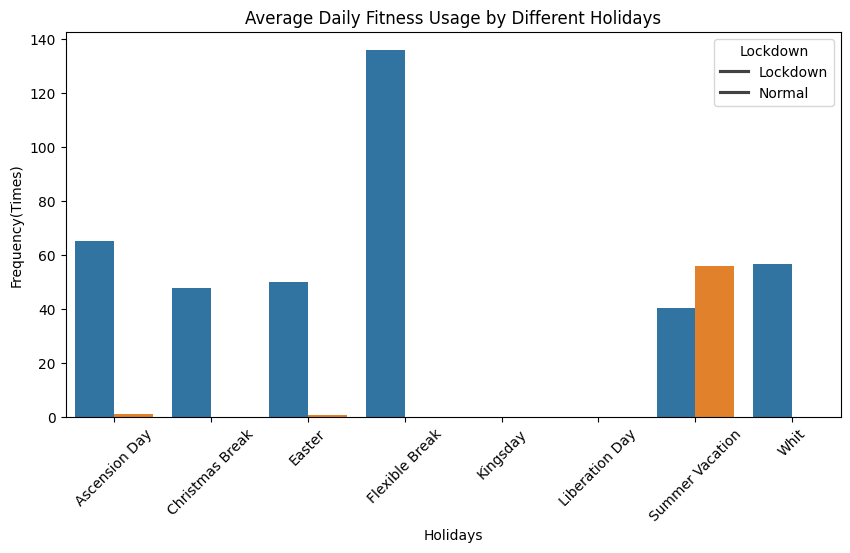

In [78]:
#plot
plt.figure(figsize=(10,5))
plot = sns.barplot(data = allHoliday, x="holiday", y="average_usage", hue="Lockdown")
plot.set_title("Average Daily Fitness Usage by Different Holidays")
plot.set_xlabel("Holidays")
plot.set_ylabel("Frequency(Times)")
plot.legend(title = "Lockdown", labels = ["Lockdown", "Normal"])
plt.xticks(rotation = 45)


plt.show()

In [79]:
holidayDF = checkinDF[["holiday", "covid"]]

In [80]:
holidayDF.loc[~(holidayDF["holiday"].isna()), "holiday"] = 1
holidayDF.loc[holidayDF["holiday"].isna(), "holiday"] = 0
display(holidayDF.head())

,holiday,covid
0,1,0.0
1,1,0.0
2,1,0.0
3,1,0.0
4,1,0.0


In [81]:
print(holidayDF["holiday"].value_counts())

holiday
0    308791
1     25823
Name: count, dtype: int64


The same goes with workday, since most days in a year are not holiday, I decided to devide the usage during that holiday with the days of that holiday, to see the average daily usage during workdays and holidays

In [82]:
calendarHoliday = calendar[["holiday", "Lockdown"]]

calendarHoliday.loc[~(calendarHoliday["holiday"].isna()), "holiday"] = 1
calendarHoliday.loc[calendarHoliday["holiday"].isna(), "holiday"] = 0
display(calendarHoliday.head())

,holiday,Lockdown
date,,
2017-01-01,1,0.0
2017-01-02,1,0.0
2017-01-03,1,0.0
2017-01-04,1,0.0
2017-01-05,1,0.0


In [83]:
holiday = holidayDF.groupby(["covid", "holiday"]).size().reset_index(name='usage')
calHoliday = calendarHoliday.groupby(["Lockdown", "holiday"]).size().reset_index(name='days')
display(holiday)
display(calHoliday)

,covid,holiday,usage
0,0.0,0,283032
1,0.0,1,21121
2,1.0,0,25759
3,1.0,1,4702


,Lockdown,holiday,days
0,0.0,0,2020
1,0.0,1,478
2,1.0,0,510
3,1.0,1,126


In [84]:
allCovid = calHoliday.merge(holiday, how = "left", left_on = ["Lockdown", "holiday"], right_on = ["covid", "holiday"])

display(allCovid)

,Lockdown,holiday,days,covid,usage
0,0.0,0,2020,0.0,283032
1,0.0,1,478,0.0,21121
2,1.0,0,510,1.0,25759
3,1.0,1,126,1.0,4702


In [85]:
allCovid["average_usage"] = allCovid["usage"] / allCovid["days"]
display(allCovid)

,Lockdown,holiday,days,covid,usage,average_usage
0,0.0,0,2020,0.0,283032,140.114851
1,0.0,1,478,0.0,21121,44.186192
2,1.0,0,510,1.0,25759,50.507843
3,1.0,1,126,1.0,4702,37.317460


C:\Users\watas\AppData\Local\Temp\ipykernel_19512\3886615067.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  day.set_xticklabels(dayType)


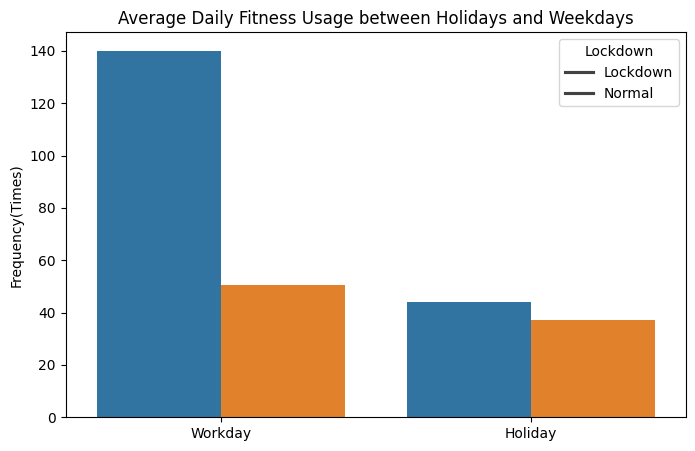

In [86]:
#plot
plt.figure(figsize=(8,5))
day = sns.barplot(data = allCovid, x="holiday", y="average_usage", hue="Lockdown")
day.set_title("Average Daily Fitness Usage between Holidays and Weekdays")
day.set_xlabel("")
day.set_ylabel("Frequency(Times)")
day.legend(title = "Lockdown", labels = ["Lockdown", "Normal"])

dayType = ["Workday", "Holiday"]
day.set_xticklabels(dayType)


plt.show()

### Used Times during Exam Period

In [87]:
#check in time during exam
def getExam(datetime):
    date = datetime.date()
    return calendar.loc[date, "Exam"]

In [88]:
checkinDF["exam"] = checkinDF["checkin_time"].apply(getExam)
display(checkinDF.head())

,client_id,institution,gender,card_type,checkin_time,year,month,day,season,holiday,covid,exam
0,168236,Medewerker RUG/Hanze,M,Fitness Card 2016-2017,2017-08-01 12:49:10,2017,August,Tuesday,Summer,Summer Vacation,0.0,0.0
1,132339,RUG,M,Fitness Card 2016-2017,2017-08-01 12:53:11,2017,August,Tuesday,Summer,Summer Vacation,0.0,0.0
2,141170,RUG,M,Fitness Card 2016-2017,2017-08-01 12:53:34,2017,August,Tuesday,Summer,Summer Vacation,0.0,0.0
3,141170,RUG,M,Fitness Card 2016-2017,2017-08-01 12:54:13,2017,August,Tuesday,Summer,Summer Vacation,0.0,0.0
4,186817,RUG,M,Fitness Card 2016-2017,2017-08-01 13:00:58,2017,August,Tuesday,Summer,Summer Vacation,0.0,0.0


In [89]:
#normalized exam and normal school day
numExam = checkinDF[checkinDF["holiday"].isna()].groupby(["covid", "exam"]).size().reset_index(name = "usage")
display(numExam)

,covid,exam,usage
0,0.0,0.0,219500
1,0.0,1.0,63532
2,1.0,0.0,17812
3,1.0,1.0,7947


In [90]:
calExam = calendar[calendar["holiday"].isna()].groupby(["Lockdown", "Exam"]).size().reset_index(name = "days")
display(calExam)

,Lockdown,Exam,days
0,0.0,0.0,1497
1,0.0,1.0,523
2,1.0,0.0,349
3,1.0,1.0,161


In [91]:
allExam = calExam.merge(numExam, how = "left", left_on = ["Lockdown", "Exam"], right_on = ["covid", "exam"])

allExam["average_usage"] = allExam["usage"] / allExam["days"]
display(allExam)

,Lockdown,Exam,days,covid,exam,usage,average_usage
0,0.0,0.0,1497,0.0,0.0,219500,146.626587
1,0.0,1.0,523,0.0,1.0,63532,121.476099
2,1.0,0.0,349,1.0,0.0,17812,51.037249
3,1.0,1.0,161,1.0,1.0,7947,49.360248


C:\Users\watas\AppData\Local\Temp\ipykernel_19512\3737982097.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  exam.set_xticklabels(examType)


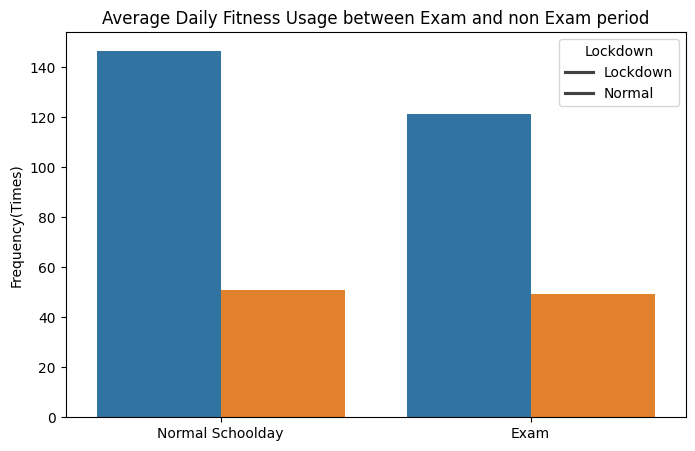

In [92]:
#plot
plt.figure(figsize=(8,5))
exam = sns.barplot(data = allExam, x="exam", y="average_usage", hue="Lockdown")
exam.set_title("Average Daily Fitness Usage between Exam and non Exam period")
exam.set_xlabel("")
exam.set_ylabel("Frequency(Times)")
exam.legend(title = "Lockdown", labels = ["Lockdown", "Normal"])

examType = ["Normal Schoolday", "Exam"]
exam.set_xticklabels(examType)


plt.show()

### Used Times by Weather

In [93]:
#load the weather data

#read calendar
weather = pd.read_csv("./weather.csv")
display(weather.head())

,date,mean_temp,diff_temp,max_temp,min_temp
0,1/1/2017,0.5,2.7,1.9,-0.8
1,1/2/2017,3.0,7.1,6.8,-0.3
2,1/3/2017,5.0,5.6,7.1,1.5
3,1/4/2017,5.8,4.7,7.3,2.6
4,1/5/2017,0.0,9.2,3.3,-5.9


In [94]:
print(type(weather.loc[0, "date"]))

<class 'str'>


In [95]:
weather["date"] = weather["date"].apply(pd.to_datetime).apply(lambda x: x.date())
print(type(weather.loc[0, "date"]))

<class 'datetime.date'>


In [96]:
#set date as index
weather = weather.set_index("date")
display(weather.head())

,mean_temp,diff_temp,max_temp,min_temp
date,,,,
2017-01-01,0.5,2.7,1.9,-0.8
2017-01-02,3.0,7.1,6.8,-0.3
2017-01-03,5.0,5.6,7.1,1.5
2017-01-04,5.8,4.7,7.3,2.6
2017-01-05,0.0,9.2,3.3,-5.9


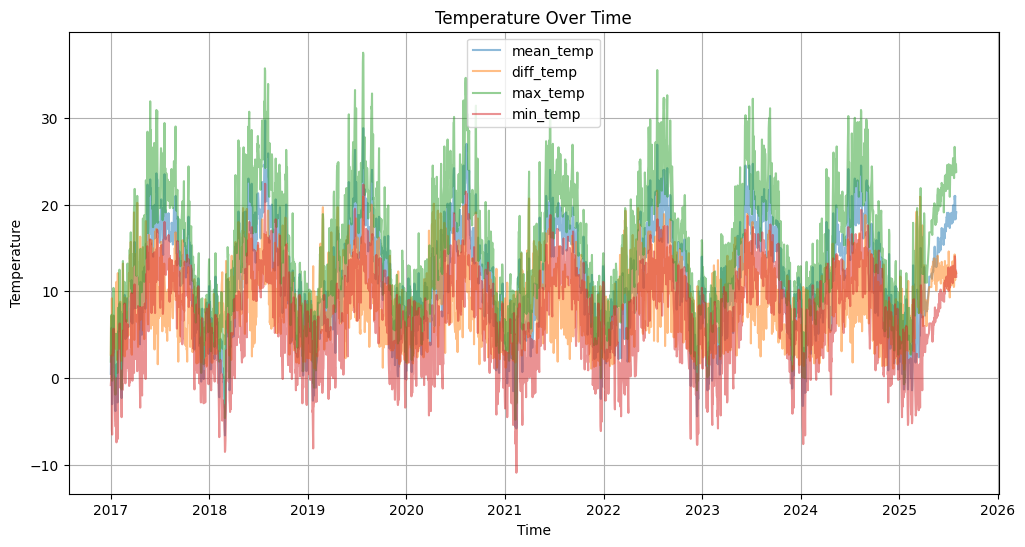

In [97]:
#plot
plt.figure(figsize=(12, 6))
for column in weather.columns:
    sns.lineplot(x=weather.index, y=weather[column], label=column, alpha=0.5)

# Set labels and title
plt.xlabel('Time')
plt.ylabel('Temperature')
plt.title('Temperature Over Time')
plt.grid(True)
plt.show()

# Data Preparation for Prediction

## Create Input Dataset

In [98]:
#create input dataset
byDateDF = checkinDF.groupby(checkinDF["checkin_time"].dt.date).size().reset_index(name = "usage")
byDateDF = byDateDF.sort_values("checkin_time")
display(byDateDF)

,checkin_time,usage
0,2017-08-01,150
1,2017-08-02,127
2,2017-08-03,133
3,2017-08-04,142
4,2017-08-07,162
...,...,...
1260,2021-11-27,178
1261,2021-11-28,148
1262,2021-11-29,184
1263,2021-11-30,194


In [99]:
print(type(byDateDF["checkin_time"][0]))

<class 'datetime.date'>


In [100]:
calendar.index = pd.to_datetime(calendar.index).date
completeDate = calendar[(calendar.index > pd.to_datetime("2017-07-31").date()) &\
                         (calendar.index < pd.to_datetime("2022-01-01").date())]
display(completeDate)

,holiday,Exam,Lockdown
2017-08-01,Summer Vacation,0.0,0.0
2017-08-02,Summer Vacation,0.0,0.0
2017-08-03,Summer Vacation,0.0,0.0
2017-08-04,Summer Vacation,0.0,0.0
2017-08-05,Summer Vacation,0.0,0.0
...,...,...,...
2021-12-27,Christmas Break,0.0,1.0
2021-12-28,Christmas Break,0.0,1.0
2021-12-29,Christmas Break,0.0,1.0
2021-12-30,Christmas Break,0.0,1.0


In [101]:
completeDate.loc[completeDate["holiday"].isna(), "holiday"] = "None"

display(completeDate)

,holiday,Exam,Lockdown
2017-08-01,Summer Vacation,0.0,0.0
2017-08-02,Summer Vacation,0.0,0.0
2017-08-03,Summer Vacation,0.0,0.0
2017-08-04,Summer Vacation,0.0,0.0
2017-08-05,Summer Vacation,0.0,0.0
...,...,...,...
2021-12-27,Christmas Break,0.0,1.0
2021-12-28,Christmas Break,0.0,1.0
2021-12-29,Christmas Break,0.0,1.0
2021-12-30,Christmas Break,0.0,1.0


In [102]:
datas = byDateDF.merge(completeDate, how = "right", left_on="checkin_time", right_on=completeDate.index)
datas = datas.fillna(0)
display(datas)

,checkin_time,usage,holiday,Exam,Lockdown
0,2017-08-01,150.0,Summer Vacation,0.0,0.0
1,2017-08-02,127.0,Summer Vacation,0.0,0.0
2,2017-08-03,133.0,Summer Vacation,0.0,0.0
3,2017-08-04,142.0,Summer Vacation,0.0,0.0
4,2017-08-05,0.0,Summer Vacation,0.0,0.0
...,...,...,...,...,...
1609,2021-12-27,0.0,Christmas Break,0.0,1.0
1610,2021-12-28,0.0,Christmas Break,0.0,1.0
1611,2021-12-29,0.0,Christmas Break,0.0,1.0
1612,2021-12-30,0.0,Christmas Break,0.0,1.0


In [103]:
datas["season"] = datas["checkin_time"].apply(getSeason)

display(datas)

,checkin_time,usage,holiday,Exam,Lockdown,season
0,2017-08-01,150.0,Summer Vacation,0.0,0.0,Summer
1,2017-08-02,127.0,Summer Vacation,0.0,0.0,Summer
2,2017-08-03,133.0,Summer Vacation,0.0,0.0,Summer
3,2017-08-04,142.0,Summer Vacation,0.0,0.0,Summer
4,2017-08-05,0.0,Summer Vacation,0.0,0.0,Summer
...,...,...,...,...,...,...
1609,2021-12-27,0.0,Christmas Break,0.0,1.0,Winter
1610,2021-12-28,0.0,Christmas Break,0.0,1.0,Winter
1611,2021-12-29,0.0,Christmas Break,0.0,1.0,Winter
1612,2021-12-30,0.0,Christmas Break,0.0,1.0,Winter


In [104]:
datas = datas.rename(columns={"Exam": "exam", "Lockdown": "covid"}).reset_index(drop=True)
display(datas)

,checkin_time,usage,holiday,exam,covid,season
0,2017-08-01,150.0,Summer Vacation,0.0,0.0,Summer
1,2017-08-02,127.0,Summer Vacation,0.0,0.0,Summer
2,2017-08-03,133.0,Summer Vacation,0.0,0.0,Summer
3,2017-08-04,142.0,Summer Vacation,0.0,0.0,Summer
4,2017-08-05,0.0,Summer Vacation,0.0,0.0,Summer
...,...,...,...,...,...,...
1609,2021-12-27,0.0,Christmas Break,0.0,1.0,Winter
1610,2021-12-28,0.0,Christmas Break,0.0,1.0,Winter
1611,2021-12-29,0.0,Christmas Break,0.0,1.0,Winter
1612,2021-12-30,0.0,Christmas Break,0.0,1.0,Winter


In [105]:
datas["day"] = pd.to_datetime(datas["checkin_time"]).dt.day_name()
display(datas)

,checkin_time,usage,holiday,exam,covid,season,day
0,2017-08-01,150.0,Summer Vacation,0.0,0.0,Summer,Tuesday
1,2017-08-02,127.0,Summer Vacation,0.0,0.0,Summer,Wednesday
2,2017-08-03,133.0,Summer Vacation,0.0,0.0,Summer,Thursday
3,2017-08-04,142.0,Summer Vacation,0.0,0.0,Summer,Friday
4,2017-08-05,0.0,Summer Vacation,0.0,0.0,Summer,Saturday
...,...,...,...,...,...,...,...
1609,2021-12-27,0.0,Christmas Break,0.0,1.0,Winter,Monday
1610,2021-12-28,0.0,Christmas Break,0.0,1.0,Winter,Tuesday
1611,2021-12-29,0.0,Christmas Break,0.0,1.0,Winter,Wednesday
1612,2021-12-30,0.0,Christmas Break,0.0,1.0,Winter,Thursday


In [106]:
def instituteGroup(institutions):
        uniqueGroup = sorted(institutions.unique())
        num = len(uniqueGroup)

        if num == 1:
            return uniqueGroup[0]  # Only one school
        elif num == 2:
            return ','.join(uniqueGroup)  # Two schools, joined by ','
        elif num == 3:
            return 'all'  # All schools
        else:
            return 'none' # this line should never be reached in this example.

In [107]:
#whether user from each institution go to fitness on that date
bySchool = checkinDF.groupby(pd.to_datetime(checkinDF["checkin_time"]).dt.date)["institution"].agg(instituteGroup).reset_index(name="institution")

print(bySchool["institution"].value_counts(dropna=False))

institution
all                         1248
Hanze,RUG                     10
RUG                            5
Medewerker RUG/Hanze,RUG       2
Name: count, dtype: int64


In [108]:
datas = datas.merge(bySchool, how = "left", on="checkin_time")
datas = datas.fillna("None")
display(datas)

,checkin_time,usage,holiday,exam,covid,season,day,institution
0,2017-08-01,150.0,Summer Vacation,0.0,0.0,Summer,Tuesday,all
1,2017-08-02,127.0,Summer Vacation,0.0,0.0,Summer,Wednesday,all
2,2017-08-03,133.0,Summer Vacation,0.0,0.0,Summer,Thursday,all
3,2017-08-04,142.0,Summer Vacation,0.0,0.0,Summer,Friday,all
4,2017-08-05,0.0,Summer Vacation,0.0,0.0,Summer,Saturday,None
...,...,...,...,...,...,...,...,...
1609,2021-12-27,0.0,Christmas Break,0.0,1.0,Winter,Monday,None
1610,2021-12-28,0.0,Christmas Break,0.0,1.0,Winter,Tuesday,None
1611,2021-12-29,0.0,Christmas Break,0.0,1.0,Winter,Wednesday,None
1612,2021-12-30,0.0,Christmas Break,0.0,1.0,Winter,Thursday,None


In [109]:
def genderGroup(genders):
        uniqueGender = sorted(genders.unique())
        num = len(uniqueGender)

        if num == 1:
            return uniqueGender[0]  # Only one gender
        elif num == 2:
            return 'both'  # Both gender
        else:
            return 'none' # this line should never be reached in this example.

In [110]:
byGender = checkinDF.groupby(pd.to_datetime(checkinDF["checkin_time"]).dt.date)["gender"].agg(genderGroup).reset_index(name="gender")

print(byGender["gender"].value_counts(dropna=False))

gender
both    1250
M         14
V          1
Name: count, dtype: int64


In [111]:
datas = datas.merge(byGender, how = "left", on="checkin_time")
datas = datas.fillna("None")
display(datas)

,checkin_time,usage,holiday,exam,covid,season,day,institution,gender
0,2017-08-01,150.0,Summer Vacation,0.0,0.0,Summer,Tuesday,all,both
1,2017-08-02,127.0,Summer Vacation,0.0,0.0,Summer,Wednesday,all,both
2,2017-08-03,133.0,Summer Vacation,0.0,0.0,Summer,Thursday,all,both
3,2017-08-04,142.0,Summer Vacation,0.0,0.0,Summer,Friday,all,both
4,2017-08-05,0.0,Summer Vacation,0.0,0.0,Summer,Saturday,None,None
...,...,...,...,...,...,...,...,...,...
1609,2021-12-27,0.0,Christmas Break,0.0,1.0,Winter,Monday,None,None
1610,2021-12-28,0.0,Christmas Break,0.0,1.0,Winter,Tuesday,None,None
1611,2021-12-29,0.0,Christmas Break,0.0,1.0,Winter,Wednesday,None,None
1612,2021-12-30,0.0,Christmas Break,0.0,1.0,Winter,Thursday,None,None


In [112]:
datas = datas.merge(weather, how="left", left_on="checkin_time", right_on=weather.index)

display(datas)

,checkin_time,usage,holiday,exam,covid,season,day,institution,gender,mean_temp,diff_temp,max_temp,min_temp
0,2017-08-01,150.0,Summer Vacation,0.0,0.0,Summer,Tuesday,all,both,17.8,10.2,22.7,12.5
1,2017-08-02,127.0,Summer Vacation,0.0,0.0,Summer,Wednesday,all,both,17.6,8.5,22.0,13.5
2,2017-08-03,133.0,Summer Vacation,0.0,0.0,Summer,Thursday,all,both,19.0,6.0,22.5,16.5
3,2017-08-04,142.0,Summer Vacation,0.0,0.0,Summer,Friday,all,both,18.3,6.4,21.8,15.4
4,2017-08-05,0.0,Summer Vacation,0.0,0.0,Summer,Saturday,None,None,15.9,9.8,20.4,10.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1609,2021-12-27,0.0,Christmas Break,0.0,1.0,Winter,Monday,None,None,5.6,6.8,9.0,2.2
1610,2021-12-28,0.0,Christmas Break,0.0,1.0,Winter,Tuesday,None,None,8.8,3.4,10.7,7.3
1611,2021-12-29,0.0,Christmas Break,0.0,1.0,Winter,Wednesday,None,None,9.5,3.7,12.1,8.4
1612,2021-12-30,0.0,Christmas Break,0.0,1.0,Winter,Thursday,None,None,12.9,3.9,13.9,10.0


In [113]:
datas = datas.set_index("checkin_time")
display(datas)

,usage,holiday,exam,covid,season,day,institution,gender,mean_temp,diff_temp,max_temp,min_temp
checkin_time,,,,,,,,,,,,
2017-08-01,150.0,Summer Vacation,0.0,0.0,Summer,Tuesday,all,both,17.8,10.2,22.7,12.5
2017-08-02,127.0,Summer Vacation,0.0,0.0,Summer,Wednesday,all,both,17.6,8.5,22.0,13.5
2017-08-03,133.0,Summer Vacation,0.0,0.0,Summer,Thursday,all,both,19.0,6.0,22.5,16.5
2017-08-04,142.0,Summer Vacation,0.0,0.0,Summer,Friday,all,both,18.3,6.4,21.8,15.4
2017-08-05,0.0,Summer Vacation,0.0,0.0,Summer,Saturday,None,None,15.9,9.8,20.4,10.6
...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-27,0.0,Christmas Break,0.0,1.0,Winter,Monday,None,None,5.6,6.8,9.0,2.2
2021-12-28,0.0,Christmas Break,0.0,1.0,Winter,Tuesday,None,None,8.8,3.4,10.7,7.3
2021-12-29,0.0,Christmas Break,0.0,1.0,Winter,Wednesday,None,None,9.5,3.7,12.1,8.4


In [114]:
print(datas.isna().sum())

usage          0
holiday        0
exam           0
covid          0
season         0
day            0
institution    0
gender         0
mean_temp      0
diff_temp      0
max_temp       0
min_temp       0
dtype: int64


## Create Dummy Variables

In [115]:
def createDummy(df, holiday_col='holiday', days_col='day', gender_col='gender', institute_col='institution', season_col='season'):
    df = pd.get_dummies(df, columns=[holiday_col], prefix=holiday_col, drop_first=True)
    df = pd.get_dummies(df, columns=[days_col], prefix=days_col, drop_first=True)
    df = pd.get_dummies(df, columns=[gender_col], prefix=gender_col, drop_first=True)
    df = pd.get_dummies(df, columns=[institute_col], prefix=institute_col, drop_first=True)
    df = pd.get_dummies(df, columns=[season_col], prefix=season_col, drop_first=True)

    return df

In [116]:
datas = createDummy(datas)
display(datas)

,usage,exam,covid,mean_temp,diff_temp,max_temp,min_temp,holiday_Christmas Break,holiday_Easter,holiday_Flexible Break,...,gender_None,gender_V,gender_both,"institution_Medewerker RUG/Hanze,RUG",institution_None,institution_RUG,institution_all,season_Spring,season_Summer,season_Winter
checkin_time,,,,,,,,,,,,,,,,,,,,,
2017-08-01,150.0,0.0,0.0,17.8,10.2,22.7,12.5,False,False,False,...,False,False,True,False,False,False,True,False,True,False
2017-08-02,127.0,0.0,0.0,17.6,8.5,22.0,13.5,False,False,False,...,False,False,True,False,False,False,True,False,True,False
2017-08-03,133.0,0.0,0.0,19.0,6.0,22.5,16.5,False,False,False,...,False,False,True,False,False,False,True,False,True,False
2017-08-04,142.0,0.0,0.0,18.3,6.4,21.8,15.4,False,False,False,...,False,False,True,False,False,False,True,False,True,False
2017-08-05,0.0,0.0,0.0,15.9,9.8,20.4,10.6,False,False,False,...,True,False,False,False,True,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-27,0.0,0.0,1.0,5.6,6.8,9.0,2.2,True,False,False,...,True,False,False,False,True,False,False,False,False,True
2021-12-28,0.0,0.0,1.0,8.8,3.4,10.7,7.3,True,False,False,...,True,False,False,False,True,False,False,False,False,True
2021-12-29,0.0,0.0,1.0,9.5,3.7,12.1,8.4,True,False,False,...,True,False,False,False,True,False,False,False,False,True


## Tokenize

In [117]:
print(datas.columns)

Index(['usage', 'exam', 'covid', 'mean_temp', 'diff_temp', 'max_temp',
       'min_temp', 'holiday_Christmas Break', 'holiday_Easter',
       'holiday_Flexible Break', 'holiday_Kingsday', 'holiday_Liberation Day',
       'holiday_None', 'holiday_Summer Vacation', 'holiday_Whit', 'day_Monday',
       'day_Saturday', 'day_Sunday', 'day_Thursday', 'day_Tuesday',
       'day_Wednesday', 'gender_None', 'gender_V', 'gender_both',
       'institution_Medewerker RUG/Hanze,RUG', 'institution_None',
       'institution_RUG', 'institution_all', 'season_Spring', 'season_Summer',
       'season_Winter'],
      dtype='object')


In [118]:
from sklearn.preprocessing import LabelEncoder
encoded_classes = []
encoder = LabelEncoder()

needTokenize = datas.columns[~datas.columns.isin(["usage", "exam", "covid", "mean_temp", "diff_temp", "max_temp", "min_temp"])]

for col in needTokenize:
    datas[col] = encoder.fit_transform(datas[col])
    encoded_classes.append(encoder.classes_)

datas.head(20)

,usage,exam,covid,mean_temp,diff_temp,max_temp,min_temp,holiday_Christmas Break,holiday_Easter,holiday_Flexible Break,...,gender_None,gender_V,gender_both,"institution_Medewerker RUG/Hanze,RUG",institution_None,institution_RUG,institution_all,season_Spring,season_Summer,season_Winter
checkin_time,,,,,,,,,,,,,,,,,,,,,
2017-08-01,150.0,0.0,0.0,17.8,10.2,22.7,12.5,0,0,0,...,0,0,1,0,0,0,1,0,1,0
2017-08-02,127.0,0.0,0.0,17.6,8.5,22.0,13.5,0,0,0,...,0,0,1,0,0,0,1,0,1,0
2017-08-03,133.0,0.0,0.0,19.0,6.0,22.5,16.5,0,0,0,...,0,0,1,0,0,0,1,0,1,0
2017-08-04,142.0,0.0,0.0,18.3,6.4,21.8,15.4,0,0,0,...,0,0,1,0,0,0,1,0,1,0
2017-08-05,0.0,0.0,0.0,15.9,9.8,20.4,10.6,0,0,0,...,1,0,0,0,1,0,0,0,1,0
2017-08-06,0.0,0.0,0.0,15.8,12.7,21.7,9.0,0,0,0,...,1,0,0,0,1,0,0,0,1,0
2017-08-07,162.0,0.0,0.0,16.8,13.8,22.6,8.8,0,0,0,...,0,0,1,0,0,0,1,0,1,0
2017-08-08,117.0,0.0,0.0,16.2,5.5,19.6,14.1,0,0,0,...,0,0,1,0,0,0,1,0,1,0
2017-08-09,139.0,0.0,0.0,16.7,9.0,21.3,12.3,0,0,0,...,0,0,1,0,0,0,1,0,1,0


## Correlation

In [120]:
from itertools import product
import scipy.stats as ss

In [119]:
def plotAll(df, target_col, predictor_cols, plot_type='boxplot'):
    num_predictors = len(predictor_cols)
    rows = (num_predictors + 2) // 3  # Calculate number of rows, 3 plots per row.
    cols = min(num_predictors, 3) # Max 3 columns.

    fig, axes = plt.subplots(rows, cols, figsize=(15, 5 * rows))  # Adjust figsize as needed

    for i, predictor_col in enumerate(predictor_cols):
        row = i // cols
        col = i % cols

        ax = axes[row, col] if num_predictors > 1 else axes[col] if rows == 1 else axes[row] #Handles 1 predictor, or 1 row.

        if plot_type == 'boxplot':
            sns.boxplot(x=predictor_col, y=target_col, data=df, ax=ax)
            ax.set_title(f'{target_col} vs. {predictor_col} (Boxplot)')
        elif plot_type == 'barplot':
            sns.barplot(x=predictor_col, y=target_col, data=df, ax=ax)
            ax.set_title(f'Mean {target_col} vs. {predictor_col} (Barplot)')
        elif plot_type == 'scatterplot':
            sns.scatterplot(x=predictor_col, y=target_col, data=df, ax=ax)
            ax.set_title(f'{target_col} vs. {predictor_col} (Scatterplot)')
        else:
            print(f"Invalid plot_type: {plot_type}. Using boxplot instead.")
            sns.boxplot(x=predictor_col, y=target_col, data=df, ax=ax)
            ax.set_title(f'{target_col} vs. {predictor_col} (Boxplot)')

    # Hide any unused subplots
    if num_predictors < rows * cols:
        for j in range(num_predictors, rows * cols):
            if num_predictors > 1:
                axes[j // cols, j % cols].set_visible(False)
            elif rows > 1:
                axes[j].set_visible(False)
            else:
                axes[j].set_visible(False)

    plt.tight_layout() # Improves subplot spacing
    plt.show()

In [121]:
predictor = datas.columns.drop("usage")
target = ["usage"]

#create all possible combinations
pairs = list(product(predictor,predictor, repeat = 1))
print(pairs)

[('exam', 'exam'), ('exam', 'covid'), ('exam', 'mean_temp'), ('exam', 'diff_temp'), ('exam', 'max_temp'), ('exam', 'min_temp'), ('exam', 'holiday_Christmas Break'), ('exam', 'holiday_Easter'), ('exam', 'holiday_Flexible Break'), ('exam', 'holiday_Kingsday'), ('exam', 'holiday_Liberation Day'), ('exam', 'holiday_None'), ('exam', 'holiday_Summer Vacation'), ('exam', 'holiday_Whit'), ('exam', 'day_Monday'), ('exam', 'day_Saturday'), ('exam', 'day_Sunday'), ('exam', 'day_Thursday'), ('exam', 'day_Tuesday'), ('exam', 'day_Wednesday'), ('exam', 'gender_None'), ('exam', 'gender_V'), ('exam', 'gender_both'), ('exam', 'institution_Medewerker RUG/Hanze,RUG'), ('exam', 'institution_None'), ('exam', 'institution_RUG'), ('exam', 'institution_all'), ('exam', 'season_Spring'), ('exam', 'season_Summer'), ('exam', 'season_Winter'), ('covid', 'exam'), ('covid', 'covid'), ('covid', 'mean_temp'), ('covid', 'diff_temp'), ('covid', 'max_temp'), ('covid', 'min_temp'), ('covid', 'holiday_Christmas Break'), ('

### Continuous Data

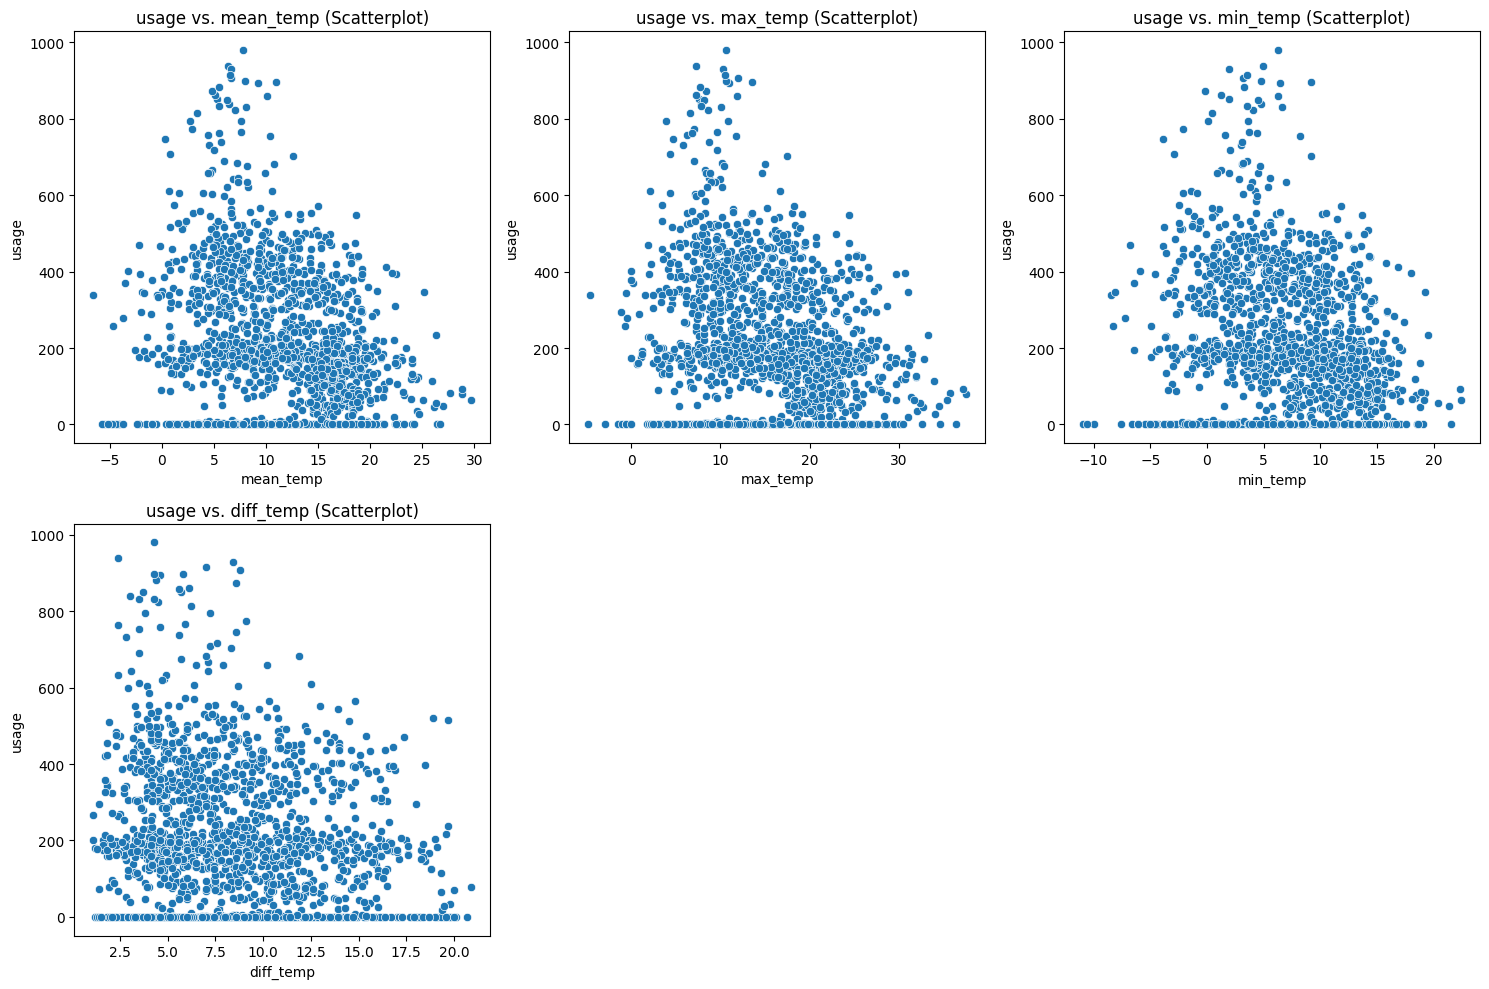

In [123]:
plotAll(datas, target[0], ["mean_temp", "max_temp", "min_temp", "diff_temp"], plot_type='scatterplot')

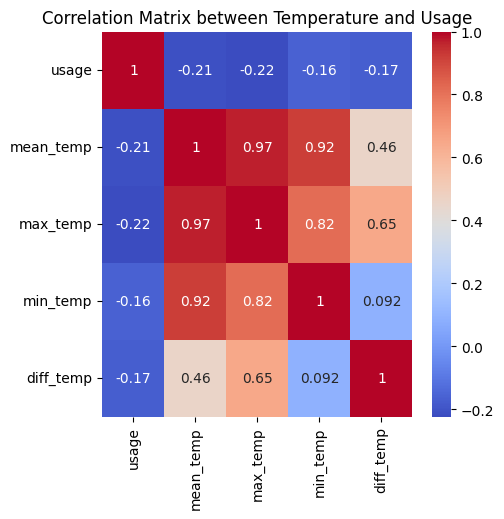

In [124]:
plt.figure(figsize=(5,5))
plot = sns.heatmap(datas[["usage", "mean_temp", "max_temp", "min_temp", "diff_temp"]].corr(), annot = True, cmap='coolwarm')
plot.set_title("Correlation Matrix between Temperature and Usage")
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

### Categorical Data

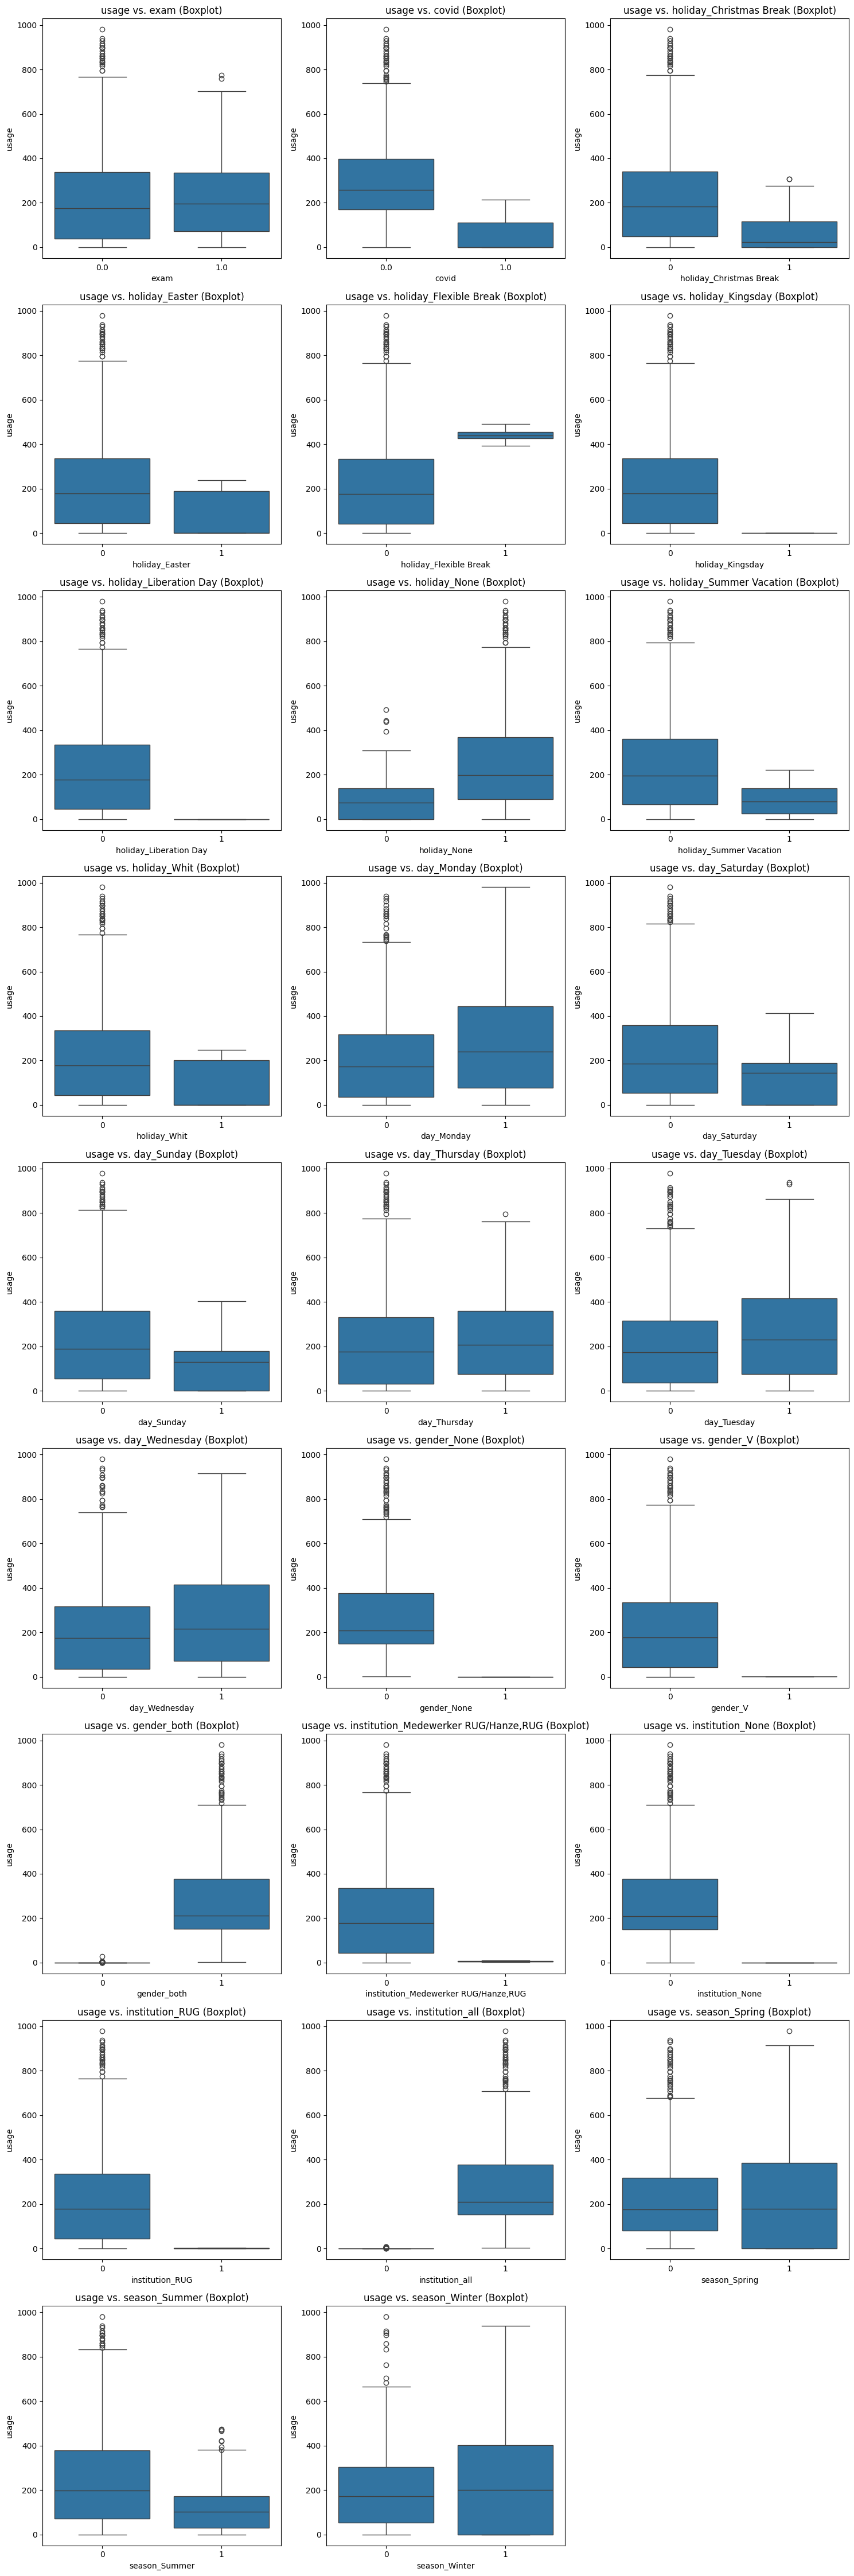

In [122]:
plotAll(datas, target[0], predictor.drop(["mean_temp", "max_temp", "min_temp", "diff_temp"]), plot_type='boxplot')

In [125]:
predictor = datas.columns.drop(["usage"])
target = ["usage"]

#create all possible combinations
pairs = list(product(predictor.drop(["mean_temp", "max_temp", "min_temp", "diff_temp"]),predictor.drop(["mean_temp", "max_temp", "min_temp", "diff_temp"]), repeat = 1))
print(pairs)

[('exam', 'exam'), ('exam', 'covid'), ('exam', 'holiday_Christmas Break'), ('exam', 'holiday_Easter'), ('exam', 'holiday_Flexible Break'), ('exam', 'holiday_Kingsday'), ('exam', 'holiday_Liberation Day'), ('exam', 'holiday_None'), ('exam', 'holiday_Summer Vacation'), ('exam', 'holiday_Whit'), ('exam', 'day_Monday'), ('exam', 'day_Saturday'), ('exam', 'day_Sunday'), ('exam', 'day_Thursday'), ('exam', 'day_Tuesday'), ('exam', 'day_Wednesday'), ('exam', 'gender_None'), ('exam', 'gender_V'), ('exam', 'gender_both'), ('exam', 'institution_Medewerker RUG/Hanze,RUG'), ('exam', 'institution_None'), ('exam', 'institution_RUG'), ('exam', 'institution_all'), ('exam', 'season_Spring'), ('exam', 'season_Summer'), ('exam', 'season_Winter'), ('covid', 'exam'), ('covid', 'covid'), ('covid', 'holiday_Christmas Break'), ('covid', 'holiday_Easter'), ('covid', 'holiday_Flexible Break'), ('covid', 'holiday_Kingsday'), ('covid', 'holiday_Liberation Day'), ('covid', 'holiday_None'), ('covid', 'holiday_Summer

In [126]:
#define Carmer's V
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y) 
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()  
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    
    denominator = min((kcorr-1), (rcorr-1))
    if denominator <= 0:
        return 0
    else:
        return np.sqrt(phi2corr / denominator)

In [127]:
result = []

for x1, x2 in pairs:
    cramersv = cramers_v(datas[x1], datas[x2])
    result.append((x1,x2,cramersv))

print(result)

[('exam', 'exam', np.float64(0.9981594494039469)), ('exam', 'covid', np.float64(0.06104731587375632)), ('exam', 'holiday_Christmas Break', np.float64(0.09161438477036843)), ('exam', 'holiday_Easter', np.float64(0.026591647650768827)), ('exam', 'holiday_Flexible Break', np.float64(0.0)), ('exam', 'holiday_Kingsday', np.float64(0.0)), ('exam', 'holiday_Liberation Day', np.float64(0.0)), ('exam', 'holiday_None', np.float64(0.24957149831343506)), ('exam', 'holiday_Summer Vacation', np.float64(0.20052670050046262)), ('exam', 'holiday_Whit', np.float64(0.007892756096893157)), ('exam', 'day_Monday', np.float64(0.0)), ('exam', 'day_Saturday', np.float64(0.04940193803819767)), ('exam', 'day_Sunday', np.float64(0.04940193803819767)), ('exam', 'day_Thursday', np.float64(0.006677997599437419)), ('exam', 'day_Tuesday', np.float64(0.006677997599437419)), ('exam', 'day_Wednesday', np.float64(0.006677997599437419)), ('exam', 'gender_None', np.float64(0.0)), ('exam', 'gender_V', np.float64(0.0)), ('exa

In [128]:
resultOutput = pd.DataFrame(result, columns = ["var1", "var2", "corr"])

## Using pivot function to convert the above DataFrame into a crosstab
resultPivot = resultOutput.pivot(index="var1", columns="var2", values="corr")

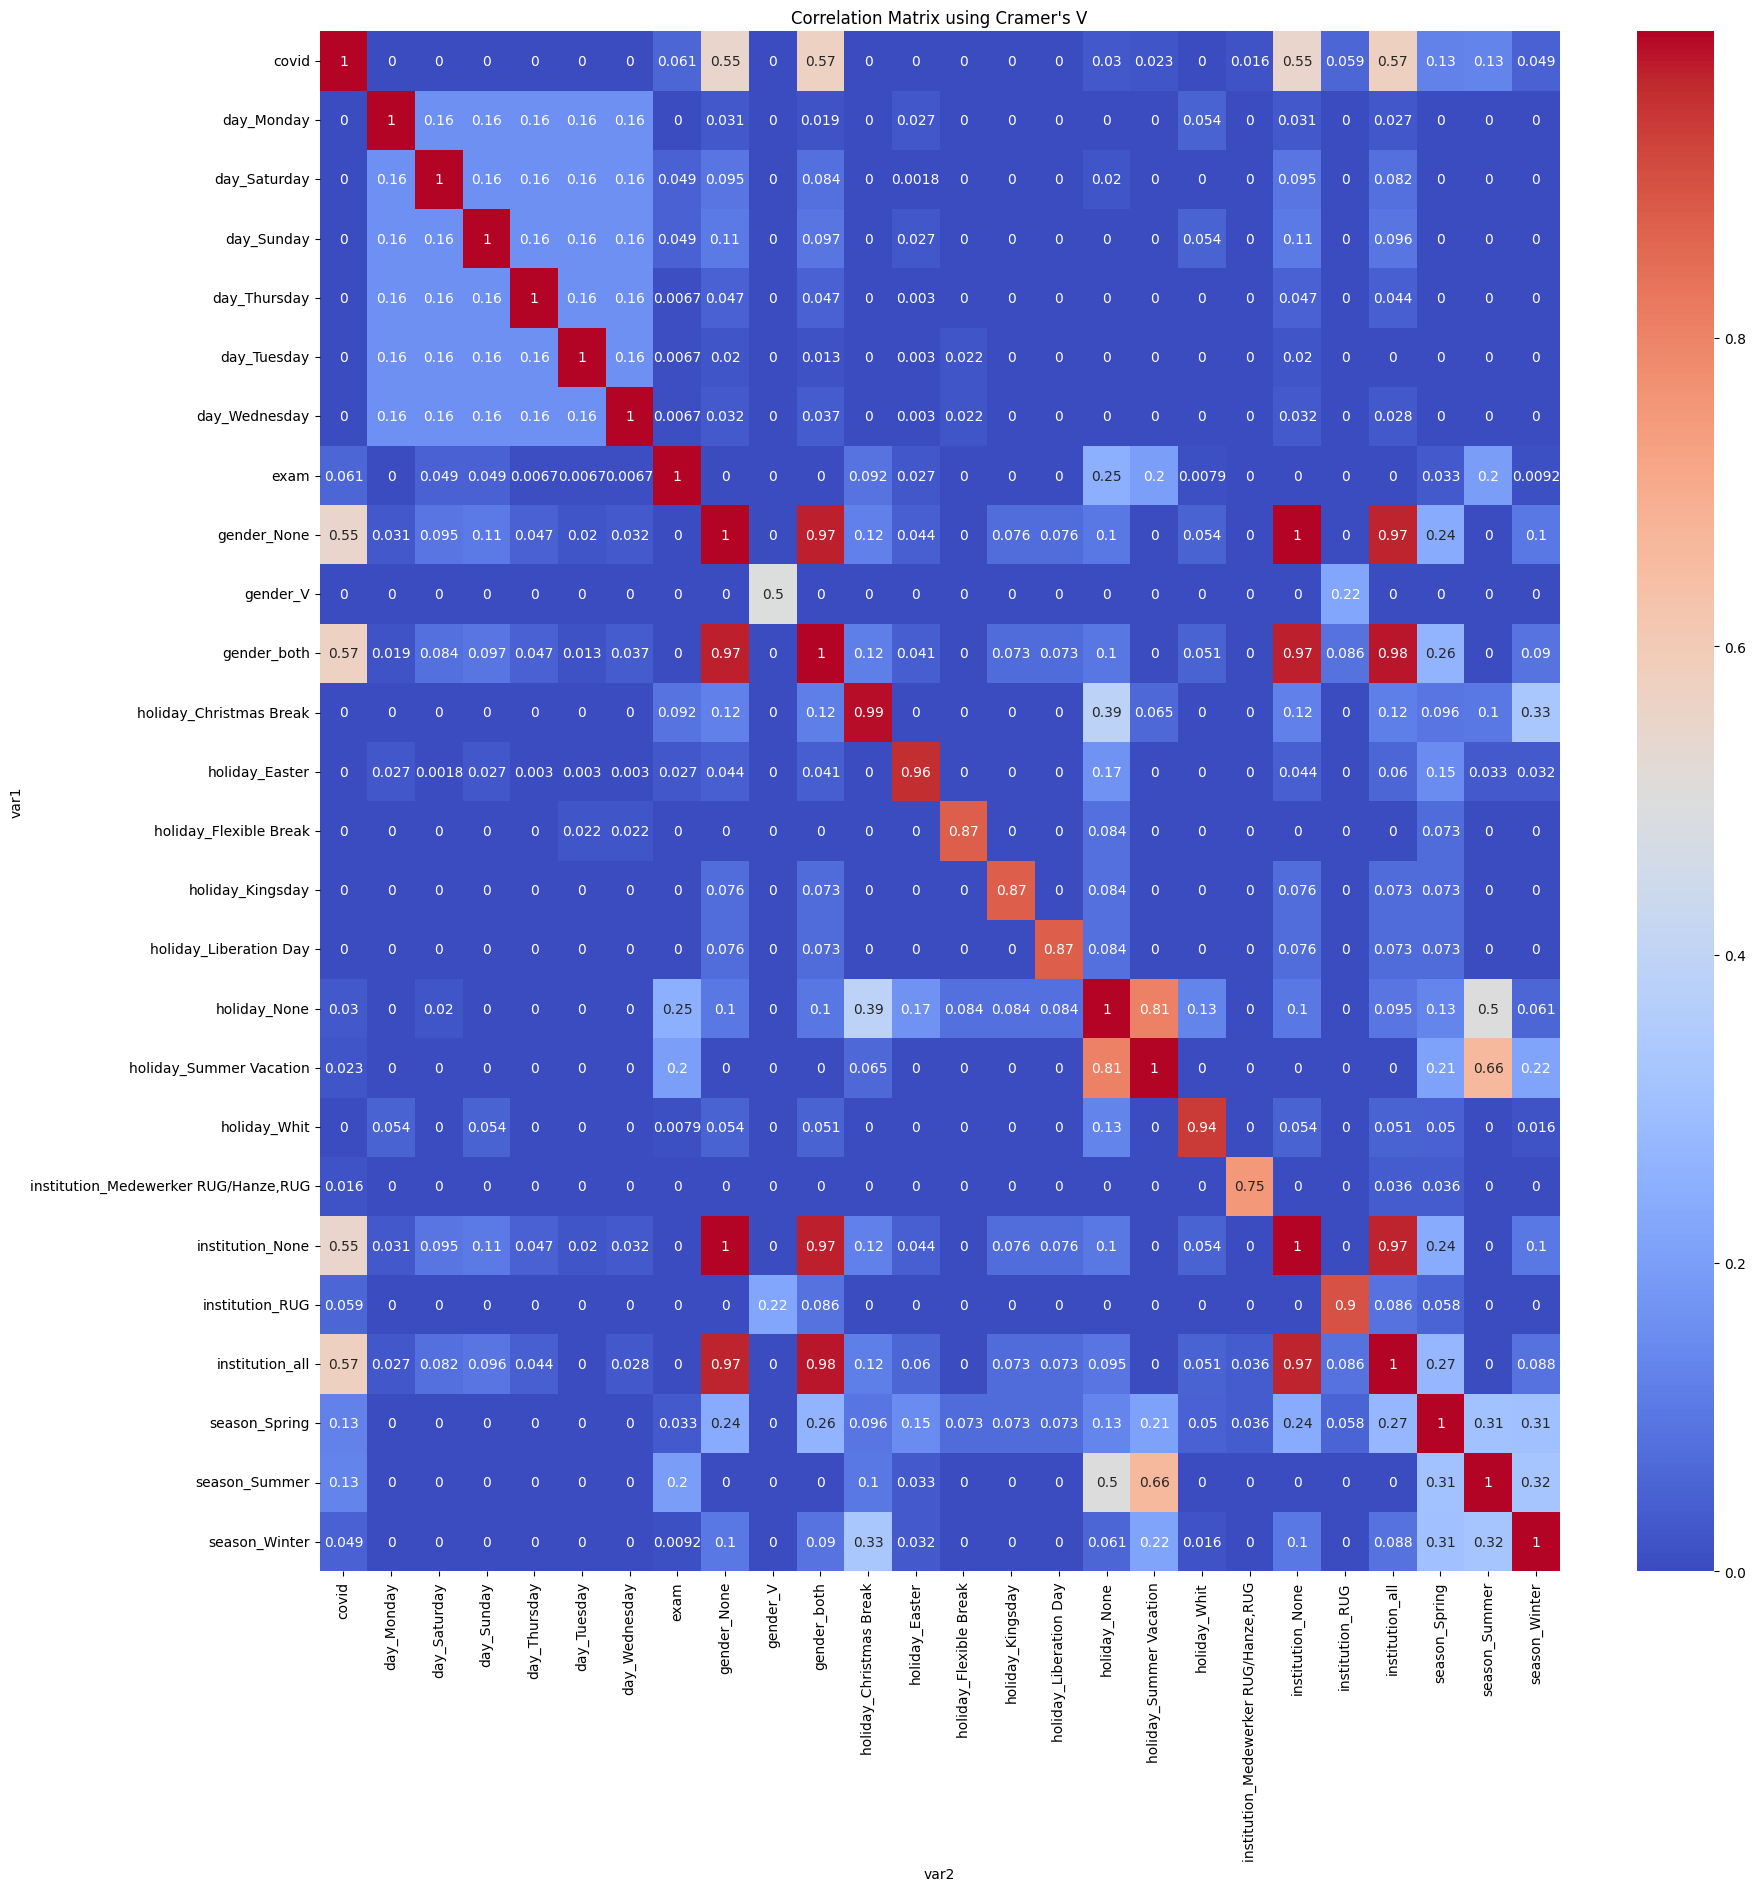

In [129]:
#plot into heatmap
plt.figure(figsize=(20,20))
plot = sns.heatmap(resultPivot, annot = True, cmap='coolwarm')
plot.set_title("Correlation Matrix using Cramer's V")
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

### DAG

In [183]:
# Initialize a directed graph
dag = nx.DiGraph()

# Add nodes (features)
features = ["Gender", "Education Institute", "Holiday", "Covid", "numFitness"]
dag.add_nodes_from(features)

# Define the relationships based on bar plot, scatter plot and correlation matrix
edges = [
    ("Gender", "Education Institute"),
    ("Covid", "numFitness"),
    ("Covid", "Holiday"),
    ("Holiday", "numFitness"),
    ("Education Institute", "numFitness"),
    ("Gender", "numFitness"),
]

dag.add_edges_from(edges)

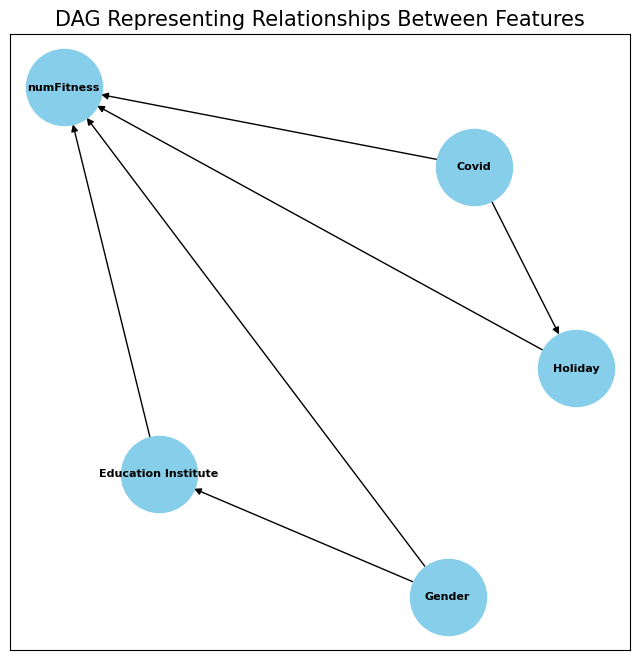

In [188]:
# Visualize the DAG
plt.figure(figsize=(8, 8))
pos = nx.spring_layout(dag, iterations=1000)  # Position nodes using Fruchterman-Reingold force-directed algorithm
nx.draw_networkx(dag, pos, with_labels=True, node_size=3000, node_color="skyblue", font_size=8, font_weight='bold', edge_color='black')
plt.title("DAG Representing Relationships Between Features", fontsize=15)

plt.show()

## Feature Selection

In [132]:
display(datas.head())

,usage,exam,covid,mean_temp,diff_temp,max_temp,min_temp,holiday_Christmas Break,holiday_Easter,holiday_Flexible Break,...,gender_None,gender_V,gender_both,"institution_Medewerker RUG/Hanze,RUG",institution_None,institution_RUG,institution_all,season_Spring,season_Summer,season_Winter
checkin_time,,,,,,,,,,,,,,,,,,,,,
2017-08-01,150.0,0.0,0.0,17.8,10.2,22.7,12.5,0,0,0,...,0,0,1,0,0,0,1,0,1,0
2017-08-02,127.0,0.0,0.0,17.6,8.5,22.0,13.5,0,0,0,...,0,0,1,0,0,0,1,0,1,0
2017-08-03,133.0,0.0,0.0,19.0,6.0,22.5,16.5,0,0,0,...,0,0,1,0,0,0,1,0,1,0
2017-08-04,142.0,0.0,0.0,18.3,6.4,21.8,15.4,0,0,0,...,0,0,1,0,0,0,1,0,1,0
2017-08-05,0.0,0.0,0.0,15.9,9.8,20.4,10.6,0,0,0,...,1,0,0,0,1,0,0,0,1,0


In [133]:
from sklearn.feature_selection import VarianceThreshold

selector = VarianceThreshold(0.001)

selector.fit_transform(datas.drop("usage", axis=1))

array([[ 0. ,  0. , 17.8, ...,  0. ,  1. ,  0. ],
       [ 0. ,  0. , 17.6, ...,  0. ,  1. ,  0. ],
       [ 0. ,  0. , 19. , ...,  0. ,  1. ,  0. ],
       ...,
       [ 0. ,  1. ,  9.5, ...,  0. ,  0. ,  1. ],
       [ 0. ,  1. , 12.9, ...,  0. ,  0. ,  1. ],
       [ 0. ,  1. , 12.8, ...,  0. ,  0. ,  1. ]], shape=(1614, 29))

In [134]:
# Get the indices of features with high variance
high_variance_indices = selector.get_support(indices=True)

selected_columns = ["usage"]

selected_columns.extend([predictor[i] for i in high_variance_indices.tolist()])
display(selected_columns)

['usage',
 'exam',
 'covid',
 'mean_temp',
 'diff_temp',
 'max_temp',
 'min_temp',
 'holiday_Christmas Break',
 'holiday_Easter',
 'holiday_Flexible Break',
 'holiday_Kingsday',
 'holiday_Liberation Day',
 'holiday_None',
 'holiday_Summer Vacation',
 'holiday_Whit',
 'day_Monday',
 'day_Saturday',
 'day_Sunday',
 'day_Thursday',
 'day_Tuesday',
 'day_Wednesday',
 'gender_None',
 'gender_both',
 'institution_Medewerker RUG/Hanze,RUG',
 'institution_None',
 'institution_RUG',
 'institution_all',
 'season_Spring',
 'season_Summer',
 'season_Winter']

In [135]:
# Get the calculated variances for each feature
variances = selector.variances_

# Get the column names of the features (before transformation)
feature_names = datas.drop("usage", axis=1).columns

# Create a DataFrame to display feature names and their variances
variance_df = pd.DataFrame({'Feature': feature_names, 'Variance': variances})

# Print the DataFrame
print(variance_df[variance_df["Feature"].isin(selected_columns)])

                                 Feature   Variance
0                                   exam   0.168418
1                                  covid   0.227145
2                              mean_temp  36.879696
3                              diff_temp  17.103527
4                               max_temp  51.203333
5                               min_temp  29.929531
6                holiday_Christmas Break   0.033493
7                         holiday_Easter   0.007380
8                 holiday_Flexible Break   0.002472
9                       holiday_Kingsday   0.002472
10                holiday_Liberation Day   0.002472
11                          holiday_None   0.153646
12               holiday_Summer Vacation   0.115010
13                          holiday_Whit   0.004932
14                            day_Monday   0.122196
15                          day_Saturday   0.122196
16                            day_Sunday   0.122196
17                          day_Thursday   0.122639
18          

In [ ]:
#prevent multilinearity, base on the correlation matrix
#(min_temp, max_temp, mean_temp), 
#(gender_None, institution_None, institution_all)
#(gender_Both, institution_None, institution_all)
#(gender_Both, gender_None)
#(holiday_None, holiday_SummerVacation)
#(institution_None, institution_all)


selected_columns.remove("min_temp")
selected_columns.remove("mean_temp")
selected_columns.remove("gender_None")
selected_columns.remove("institution_None")
selected_columns.remove("gender_both")
selected_columns.remove("holiday_Summer Vacation")
display(selected_columns)

['usage',
 'exam',
 'covid',
 'diff_temp',
 'max_temp',
 'holiday_Christmas Break',
 'holiday_Easter',
 'holiday_Flexible Break',
 'holiday_Kingsday',
 'holiday_Liberation Day',
 'holiday_None',
 'holiday_Whit',
 'day_Monday',
 'day_Saturday',
 'day_Sunday',
 'day_Thursday',
 'day_Tuesday',
 'day_Wednesday',
 'institution_Medewerker RUG/Hanze,RUG',
 'institution_RUG',
 'institution_all',
 'season_Spring',
 'season_Summer',
 'season_Winter']

In [137]:
filtered = datas[selected_columns]
display(filtered)

,usage,exam,covid,diff_temp,max_temp,holiday_Christmas Break,holiday_Easter,holiday_Flexible Break,holiday_Kingsday,holiday_Liberation Day,...,day_Sunday,day_Thursday,day_Tuesday,day_Wednesday,"institution_Medewerker RUG/Hanze,RUG",institution_RUG,institution_all,season_Spring,season_Summer,season_Winter
checkin_time,,,,,,,,,,,,,,,,,,,,,
2017-08-01,150.0,0.0,0.0,10.2,22.7,0,0,0,0,0,...,0,0,1,0,0,0,1,0,1,0
2017-08-02,127.0,0.0,0.0,8.5,22.0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,1,0
2017-08-03,133.0,0.0,0.0,6.0,22.5,0,0,0,0,0,...,0,1,0,0,0,0,1,0,1,0
2017-08-04,142.0,0.0,0.0,6.4,21.8,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
2017-08-05,0.0,0.0,0.0,9.8,20.4,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-27,0.0,0.0,1.0,6.8,9.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2021-12-28,0.0,0.0,1.0,3.4,10.7,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
2021-12-29,0.0,0.0,1.0,3.7,12.1,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1


In [138]:
from sklearn.ensemble import RandomForestRegressor

In [139]:
model = RandomForestRegressor(random_state=42)
model.fit(filtered[filtered.columns.drop("usage")], filtered[target[0]])

RandomForestRegressor(random_state=42)

In [140]:
# Feature Importance
importance = model.feature_importances_

In [141]:
# Create DataFrame
importanceDF = pd.DataFrame({
    'Feature': filtered.columns.drop("usage"),
    'Importance': importance
})

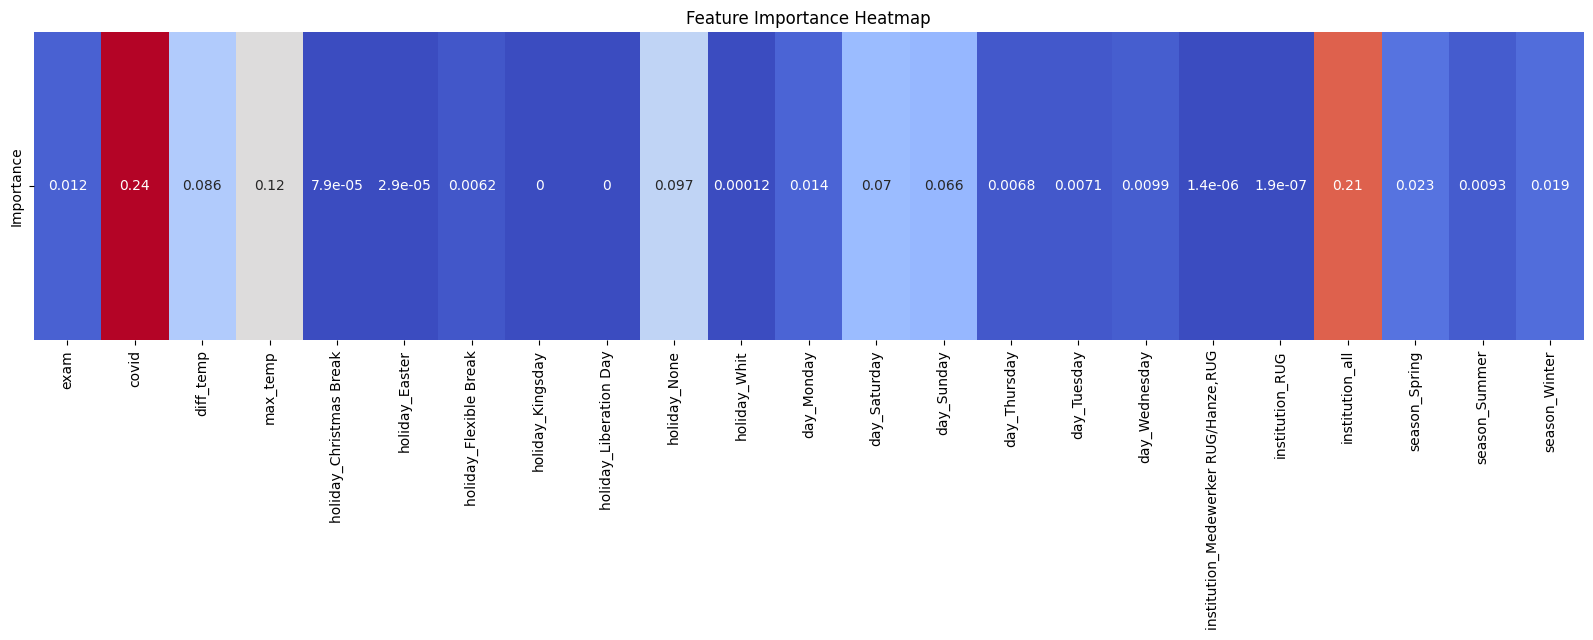

In [142]:
# Create Simple Heatmap
plt.figure(figsize=(20, 4))
sns.heatmap(importanceDF[['Importance']].T, annot=True, cmap='coolwarm', xticklabels=importanceDF['Feature'], cbar=False)
plt.title('Feature Importance Heatmap')
plt.show()

In [143]:
# Threshold based on 75th percentile
medianThreshold = np.percentile(importance, 50) #variace 0.05|0.01; svr, decision tree
q75Threshold = np.percentile(importance, 75)
meanThreshold = np.mean(importance)
stdThreshold = np.std(importance)


selected = ["usage"]

# Select features above the threshold
selected.extend(filtered.columns.drop("usage")[importance >= medianThreshold])

display(selected)

['usage',
 'exam',
 'covid',
 'diff_temp',
 'max_temp',
 'holiday_None',
 'day_Monday',
 'day_Saturday',
 'day_Sunday',
 'day_Wednesday',
 'institution_all',
 'season_Spring',
 'season_Winter']

In [144]:
filtered = datas[selected]

display(filtered.head())

,usage,exam,covid,diff_temp,max_temp,holiday_None,day_Monday,day_Saturday,day_Sunday,day_Wednesday,institution_all,season_Spring,season_Winter
checkin_time,,,,,,,,,,,,,
2017-08-01,150.0,0.0,0.0,10.2,22.7,0,0,0,0,0,1,0,0
2017-08-02,127.0,0.0,0.0,8.5,22.0,0,0,0,0,1,1,0,0
2017-08-03,133.0,0.0,0.0,6.0,22.5,0,0,0,0,0,1,0,0
2017-08-04,142.0,0.0,0.0,6.4,21.8,0,0,0,0,0,1,0,0
2017-08-05,0.0,0.0,0.0,9.8,20.4,0,0,1,0,0,0,0,0


In [145]:
o_features = len(datas.columns.drop("usage"))
print(o_features)

30


In [146]:
f_features = len(filtered.columns.drop("usage"))
print(f_features)

12


## Normalization

### Original

In [147]:
datas.describe()

,usage,exam,covid,mean_temp,diff_temp,max_temp,min_temp,holiday_Christmas Break,holiday_Easter,holiday_Flexible Break,...,gender_None,gender_V,gender_both,"institution_Medewerker RUG/Hanze,RUG",institution_None,institution_RUG,institution_all,season_Spring,season_Summer,season_Winter
count,1614.000000,1614.000000,1614.000000,1614.000000,1614.000000,1614.000000,1614.000000,1614.000000,1614.000000,1614.000000,...,1614.000000,1614.000000,1614.000000,1614.000000,1614.000000,1614.000000,1614.000000,1614.000000,1614.000000,1614.000000
mean,207.319703,0.214374,0.348823,11.199690,8.517906,15.284634,6.766729,0.034696,0.007435,0.002478,...,0.216233,0.000620,0.774473,0.001239,0.216233,0.003098,0.773234,0.228005,0.247212,0.242875
std,185.778400,0.410515,0.476746,6.074748,4.136923,7.157868,5.472484,0.183066,0.085932,0.049736,...,0.411803,0.024891,0.418058,0.035191,0.411803,0.055590,0.418870,0.419676,0.431525,0.428953
min,0.000000,0.000000,0.000000,-6.600000,1.100000,-4.800000,-10.900000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,42.000000,0.000000,0.000000,6.600000,5.200000,9.700000,2.700000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,177.500000,0.000000,0.000000,11.050000,8.000000,14.850000,6.900000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,335.000000,0.000000,1.000000,16.100000,11.200000,20.900000,10.900000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
max,980.000000,1.000000,1.000000,29.700000,20.900000,37.500000,22.400000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [148]:
Y = datas["usage"]
X = datas.drop(columns=['usage'], axis=1)

In [149]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X = scaler.fit_transform(X)
Y = scaler.fit_transform(Y.values.reshape(-1, 1))

In [150]:
X = pd.DataFrame(X)
Y = pd.DataFrame(Y)

In [151]:
X.head()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,0.0,0.0,0.672176,0.459596,0.650118,0.702703,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,0.0,0.0,0.666667,0.373737,0.633570,0.732733,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2,0.0,0.0,0.705234,0.247475,0.645390,0.822823,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,0.0,0.0,0.685950,0.267677,0.628842,0.789790,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
4,0.0,0.0,0.619835,0.439394,0.595745,0.645646,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [152]:
Y.head()

,0
0,0.153061
1,0.129592
2,0.135714
3,0.144898
4,0.000000


### Feature Selected

In [153]:
filtered.describe()

,usage,exam,covid,diff_temp,max_temp,holiday_None,day_Monday,day_Saturday,day_Sunday,day_Wednesday,institution_all,season_Spring,season_Winter
count,1614.000000,1614.000000,1614.000000,1614.000000,1614.000000,1614.000000,1614.000000,1614.000000,1614.000000,1614.000000,1614.000000,1614.000000,1614.000000
mean,207.319703,0.214374,0.348823,8.517906,15.284634,0.810409,0.142503,0.142503,0.142503,0.143123,0.773234,0.228005,0.242875
std,185.778400,0.410515,0.476746,4.136923,7.157868,0.392099,0.349674,0.349674,0.349674,0.350306,0.418870,0.419676,0.428953
min,0.000000,0.000000,0.000000,1.100000,-4.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,42.000000,0.000000,0.000000,5.200000,9.700000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,177.500000,0.000000,0.000000,8.000000,14.850000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,335.000000,0.000000,1.000000,11.200000,20.900000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,980.000000,1.000000,1.000000,20.900000,37.500000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [154]:
Y_filtered = filtered["usage"]
X_filtered = filtered.drop(columns=['usage'], axis=1)

In [155]:
X_filtered = scaler.fit_transform(X_filtered)
Y_filtered = scaler.fit_transform(Y_filtered.values.reshape(-1, 1))

In [156]:
X_filtered = pd.DataFrame(X_filtered)
Y_filtered = pd.DataFrame(Y_filtered)

In [157]:
X_filtered.head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,0.0,0.0,0.459596,0.650118,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,0.373737,0.633570,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
2,0.0,0.0,0.247475,0.645390,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,0.267677,0.628842,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,0.439394,0.595745,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [158]:
Y_filtered.head()

,0
0,0.153061
1,0.129592
2,0.135714
3,0.144898
4,0.000000


## Split Data into Train/Test sets

In [159]:
from sklearn.model_selection import train_test_split

### Original

In [160]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

In [161]:
print(X_train.shape)

(1129, 30)


In [162]:
print(y_train.shape)
print(y_test.shape)

(1129, 1)
(485, 1)


### Feature Selected

In [163]:
X_train_filtered, X_test_filtered, y_train_filtered, y_test_filtered = \
                                    train_test_split(X_filtered, Y_filtered, test_size=0.3, random_state=42)



In [164]:
print(X_train_filtered.shape)

(1129, 12)


# Evaluation Metrics

In [165]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [166]:
def adjusted_r2(y_true, y_pred, n_features):
    r2 = r2_score(y_true, y_pred)
    n = len(y_true)  # Number of observations
    denominator = n - n_features - 1

    if denominator == 0:
        return np.nan  # Or -np.inf, or some other value indicating an error
    else:
        adjusted_r2 = 1 - (1 - r2) * (n - 1) / denominator
        return adjusted_r2

In [167]:
#Evaluate model
def print_model_score(model_name, y_true, y_pred, n_features):
  print(model_name)

  # Calculate Mean Squared Error (MSE)
  mse = mean_squared_error(y_true, y_pred)
  print(f"Mean Squared Error (MSE): {mse}")

  # Calculate Mean Absolute Error (MAE)
  mae = mean_absolute_error(y_true, y_pred)
  print(f"Mean Absolute Error (MAE): {mae}")

  # Calculate R-squared (Coefficient of Determination)
  r2 = r2_score(y_true, y_pred)
  print(f"R-squared (R2): {r2}")

  # Calculate Adjusted R-squared (Remove influence of feature numbers)
  ar2 = adjusted_r2(y_true, y_pred, n_features)
  print(f"Adjusted R-squared (Adjusted-R2): {ar2}")

# Model

In [168]:
from sklearn.model_selection import RandomizedSearchCV, TimeSeriesSplit

In [169]:
tscv = TimeSeriesSplit(n_splits=5)

## Logistic Regression

In [170]:
from sklearn.linear_model import LogisticRegression

In [171]:
logModel = LogisticRegression(max_iter=200)
logModel.fit(X_train, y_train)

# predict the target value using the train data
y_pred = logModel.predict(X_test)

print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))
plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)
plt.xlabel("y_head")
plt.ylabel("y_true")
plt.show()
print('Classification Report:')
print(classification_report(y_test, y_pred))

c:\Users\watas\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


ValueError: Unknown label type: continuous. Maybe you are trying to fit a classifier, which expects discrete classes on a regression target with continuous values.

In [ ]:
#Train
lr_smote = LogisticRegression(C=10, class_weight='balanced')
lr_smote.fit(X_train, y_train)
#Test
pred_lr_smote_test = lr_smote.predict(X_test)
print_model_score('Logistic Regression (trained with SMOTE)', 'test data', pred_lr_smote_test, y_test)

c:\Users\watas\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\watas\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\watas\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.p

Logistic Regression (trained with SMOTE)
test data
              precision    recall  f1-score   support

           0       1.00      0.12      0.21        95
           1       0.00      0.00      0.00         1
           2       0.00      0.00      0.00         1
           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         1
           7       0.00      0.00      0.00         1
           8       0.00      0.00      0.00         1
          10       0.00      0.00      0.00         1
          12       0.00      0.00      0.00         0
          15       0.00      0.00      0.00         1
          18       0.00      0.00      0.00         1
          20       0.00      0.00      0.00         1
          21       0.00      0.00      0.00         1
          28       0.00      0.00      0.00         0
          32       0.00      0.00      0.00         1
          34       0.00      0.00      0.00         0
          35       0.00      0

ValueError: multi_class must be in ('ovo', 'ovr')

## Linear Regression

## Random Forest

## XG Boost

## SVR

### Original

In [189]:
from sklearn.svm import SVR
from scipy.stats import uniform, randint

In [190]:
# Create and train the SVR model
param_distributions = {
    'C': uniform(1, 100),
    'epsilon': uniform(0.01, 0.2),
    'kernel': ['rbf', 'linear', 'poly'],
    'gamma': ['scale', 'auto'],
    'degree': randint(2, 5) #integer values between 2 and 4. Only used with poly kernel.
}

# Perform grid search
random_search = RandomizedSearchCV(
    SVR(),
    param_distributions,
    n_iter=100,  # Number of parameter combinations to try
    cv=tscv,  # Cross-validation folds
    scoring='neg_mean_squared_error',
    random_state=42,
    n_jobs=-1 #use all available cores.
)

random_search.fit(X_train, y_train[0])

# Print the best parameters
print("Best Parameters:", random_search.best_params_)

Best Parameters: {'C': np.float64(43.340148070636964), 'degree': 2, 'epsilon': np.float64(0.04974313630683449), 'gamma': 'auto', 'kernel': 'poly'}


In [191]:
# Use the best model
svrModel = random_search.best_estimator_
svrModel.fit(X_train, y_train[0])

# Predictions
predictSVR = svrModel.predict(X_test)
print_model_score('SVR (original data)', y_test, predictSVR, o_features)

SVR (original data)
Mean Squared Error (MSE): 0.008272888939775113
Mean Absolute Error (MAE): 0.05888317579138397
R-squared (R2): 0.7708238507916132
Adjusted R-squared (Adjusted-R2): 0.7556800523857727


### Feature Selected

In [192]:
random_search.fit(X_train_filtered, y_train_filtered[0])

# Print the best parameters
print("Best Parameters:", random_search.best_params_)

Best Parameters: {'C': np.float64(38.454011884736246), 'degree': 2, 'epsilon': np.float64(0.04668695797323276), 'gamma': 'auto', 'kernel': 'rbf'}


In [193]:
svrModel_filtered = random_search.best_estimator_
svrModel_filtered.fit(X_train_filtered, y_train_filtered[0])

# Predictions
predictSVR_filtered = svrModel_filtered.predict(X_test_filtered)
print_model_score('SVR (feature selected)', y_test_filtered, predictSVR_filtered, f_features)

SVR (feature selected)
Mean Squared Error (MSE): 0.008474040431193946
Mean Absolute Error (MAE): 0.06006534970298104
R-squared (R2): 0.765251538078789
Adjusted R-squared (Adjusted-R2): 0.759283356843504


## Poisson Regression

### Original

In [194]:
import statsmodels.api as sm

In [195]:
def time_series_validation_split(X, y, tscv):
    train_val_splits = []

    for train_index, val_index in tscv.split(X):
        X_train, X_val = X.iloc[train_index], X.iloc[val_index]
        y_train, y_val = y.iloc[train_index], y.iloc[val_index]
        train_val_splits.append((X_train, y_train, X_val, y_val))

    return train_val_splits

In [196]:
def poisson(time_series_splits):
    best_mse = float('inf')
    best_model = None
    for X_train_fold, y_train_fold, X_val_fold, y_val_fold in time_series_splits:
        # Fit the Poisson GLM model
        poissonModel = sm.GLM(y_train_fold, X_train_fold, family=sm.families.Poisson()).fit()

        # Make predictions on the validation fold
        y_pred = poissonModel.predict(X_val_fold)

        # Evaluate the model (using MSE)
        mse = mean_squared_error(y_val_fold, y_pred)

        print(f"Validation Fold MSE: {mse}")

        # Check if this model is the best so far
        if mse < best_mse:
            best_mse = mse
            best_model = poissonModel
    return best_model

In [197]:
# Create time series validation folds
poissonSplit = time_series_validation_split(X_train, y_train, tscv)

best_model = poisson(poissonSplit)

Validation Fold MSE: 0.016450285634985715
Validation Fold MSE: 0.008053268480066525
Validation Fold MSE: 0.006986656503704489
Validation Fold MSE: 0.007777623143118929
Validation Fold MSE: 0.006043472943755066


In [198]:
y_test_pred = best_model.predict(X_test)
print_model_score("Poisson Regression (Original Data)", y_test, y_test_pred, o_features)

Poisson Regression (Original Data)
Mean Squared Error (MSE): 0.007884770343369396
Mean Absolute Error (MAE): 0.05397488030714288
R-squared (R2): 0.7815755393502226
Adjusted R-squared (Adjusted-R2): 0.7671422049460523


### Feature Selected

In [199]:
# Create time series validation folds
poissonSplit_filtered = time_series_validation_split(X_train_filtered, y_train_filtered, tscv)

best_model_filtered = poisson(poissonSplit_filtered)

Validation Fold MSE: 0.02668549879305767
Validation Fold MSE: 0.02005535721108977
Validation Fold MSE: 0.01818804407066323
Validation Fold MSE: 0.02063797747894548
Validation Fold MSE: 0.017075129615860163


In [200]:
# Predictions
y_test_pred = best_model_filtered.predict(X_test_filtered)
print_model_score("Poisson Regression (Feature Selected)", y_test_filtered, y_test_pred, f_features)

Poisson Regression (Feature Selected)
Mean Squared Error (MSE): 0.01941229031130969
Mean Absolute Error (MAE): 0.09904522316772481
R-squared (R2): 0.4622393733014183
Adjusted R-squared (Adjusted-R2): 0.4485674929616238


## Decision Tree

### Original

In [201]:
from sklearn.tree import DecisionTreeRegressor

In [202]:
# Define the parameter grid
param_distributions = {
    'max_depth': [3, 5, 7, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None]
}

# Create the RandomizedSearchCV object
random_search = RandomizedSearchCV(
    DecisionTreeRegressor(random_state=42), 
    param_distributions, 
    n_iter=100, 
    cv=tscv, 
    scoring='neg_mean_squared_error', 
    random_state=42,
    error_score='raise')

# Fit the grid search to the data
random_search.fit(X_train, y_train)

# Print the best parameters
print("Best Parameters:", random_search.best_params_)

Best Parameters: {'min_samples_split': 5, 'min_samples_leaf': 4, 'max_features': None, 'max_depth': 7}


In [203]:
# Create the Decision Tree Regression model
treeModel = random_search.best_estimator_
treeModel.fit(X_train, y_train)

# Make predictions on the test set
predictTree = treeModel.predict(X_test)
print_model_score('Decision Tree Regression (Original Data)', y_test, predictTree, o_features)

Decision Tree Regression (Original Data)
Mean Squared Error (MSE): 0.00932324623723748
Mean Absolute Error (MAE): 0.05996097802244613
R-squared (R2): 0.7417267793238682
Adjusted R-squared (Adjusted-R2): 0.7246602669443881


### Feature Selected

In [204]:
# Fit the grid search to the data
random_search.fit(X_train_filtered, y_train_filtered)

# Print the best parameters
print("Best Parameters:", random_search.best_params_)

Best Parameters: {'min_samples_split': 10, 'min_samples_leaf': 2, 'max_features': None, 'max_depth': 7}


In [205]:
treeModel_filtered = random_search.best_estimator_
treeModel_filtered.fit(X_train_filtered, y_train_filtered)

# Make predictions on the test set
predictTree_filtered = treeModel_filtered.predict(X_test_filtered)
print_model_score('Decision Tree Regression (Original Data)', y_test_filtered, predictTree_filtered, f_features)

Decision Tree Regression (Original Data)
Mean Squared Error (MSE): 0.009214786310890255
Mean Absolute Error (MAE): 0.05860528720523457
R-squared (R2): 0.7447313438048654
Adjusted R-squared (Adjusted-R2): 0.7382414627151586


# RNN

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

ModuleNotFoundError: No module named 'tensorflow'

### Create Model

In [ ]:
def initial(input_shape):
    # initializing the RNN
    regressor = tf.keras.Sequential()

    # adding first RNN layer and dropout regulatization
    regressor.add(
        tf.keras.layers.SimpleRNN(units = 50, 
              activation = "tanh", 
              return_sequences = True, 
              input_shape = input_shape)
             )
    regressor.add(
        tf.keras.layers.Dropout(0.2)
             )

    # adding second RNN layer and dropout regulatization
    regressor.add(
        tf.keras.layers.SimpleRNN(units = 50, 
              activation = "tanh", 
              return_sequences = True)
             )
    regressor.add(
        tf.keras.layers.Dropout(0.2)
             )

    # adding third RNN layer and dropout regulatization
    regressor.add(
        tf.keras.layers.SimpleRNN(units = 50, 
              activation = "tanh", 
              return_sequences = True)
             )
    regressor.add(
        tf.keras.layers.Dropout(0.2)
             )

    # adding fourth RNN layer and dropout regulatization
    regressor.add(
        tf.keras.layers.SimpleRNN(units = 50)
             )
    regressor.add(
        tf.keras.layers.Dropout(0.2)
             )

    # adding the output layer
    regressor.add(tf.keras.layers.Dense(units = 1))

    return regressor

In [ ]:
initial().summary()

### Choosing best epochs and steps with cross validation

In [ ]:
def create_sequences(data, n_steps):
    X, y = [], []
    for i in range(len(data) - n_steps):
        seq_x = data[i:i + n_steps, :-1] # Assuming the last column of data is the target
        seq_y = data[i + n_steps, -1]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)

In [ ]:
def evaluate_epochs_with_tscv(X_train, y_train, tscv, epochs_list, n_steps_list, batch_size=32):
    results = {}
    best_mean_mse = float('inf')
    best_params = {'n_steps': None, 'epochs': None}

    # Convert to NumPy arrays if they are Pandas DataFrames/Series
    X_train_np = X_train.values if hasattr(X_train, 'values') else X_train
    y_train_np = y_train.values if hasattr(y_train, 'values') else y_train

    # Combine X and y for sequence creation
    train_data = np.concatenate((X_train_np, y_train_np), axis=1)

    for n_steps in n_steps_list:
        print(f"\nEvaluating with n_steps = {n_steps}")
        X_seq, y_seq = create_sequences(train_data, n_steps)

        if len(X_seq) == 0:
            print(f"Warning: Not enough data to create sequences of length {n_steps}. Skipping.")
            continue

        for epochs in epochs_list:
            print(f"  Evaluating with {epochs} epochs:")
            fold_scores = []
            for train_index, val_index in tscv.split(X_seq):
                X_train_fold, X_val_fold = X_seq[train_index], X_seq[val_index]
                y_train_fold, y_val_fold = y_seq[train_index], y_seq[val_index]

                # Determine input shape
                n_features = X_train.shape[1]
                input_shape = (n_steps, n_features)

                # Define your RNN model
                model = initial(input_shape)
                model.compile(optimizer='adam', loss='mean_squared_error')

                # Train the model
                model.fit(X_train_fold, y_train_fold, epochs=epochs, batch_size=batch_size, verbose=0)

                # Make predictions on the validation set
                y_pred = model.predict(X_val_fold)

                # Evaluate the model
                mse = mean_squared_error(y_val_fold, y_pred)
                fold_scores.append(mse)
                print(f"    Fold MSE: {mse}")

            mean_mse = np.mean(fold_scores)
            results[(n_steps, epochs)] = fold_scores
            print(f"    Mean Validation MSE for (n_steps={n_steps}, epochs={epochs}): {mean_mse:.4f}")

            if mean_mse < best_mean_mse:
                best_mean_mse = mean_mse
                best_params['n_steps'] = n_steps
                best_params['epochs'] = epochs

    return results, best_params

In [ ]:
n_steps_to_try = [5, 10, 15, 20]
epochs_to_try = [50, 100, 150]

#### Original

In [ ]:
evaluation_results, best_parameters = evaluate_epochs_with_tscv(
    X_train, y_train, n_steps_to_try, epochs_to_try
)

print("\n--- Tuning Results ---")
for params, scores in evaluation_results.items():
    print(f"n_steps={params[0]}, epochs={params[1]}, Mean Validation MSE: {np.mean(scores):.4f}, Std Validation MSE: {np.std(scores):.4f}")

best_n_steps = best_parameters['n_steps']
best_epochs = best_parameters['epochs']

print(f"\nBest n_steps: {best_n_steps}")
print(f"Best epochs: {best_epochs}")

#### Feature Selected

In [ ]:
evaluation_results_filtered, best_parameters_filtered = evaluate_epochs_with_tscv(
    X_train_filtered, y_train_filtered, n_steps_to_try, epochs_to_try
)

print("\n--- Tuning Results ---")
for params, scores in evaluation_results_filtered.items():
    print(f"n_steps={params[0]}, epochs={params[1]}, Mean Validation MSE: {np.mean(scores):.4f}, Std Validation MSE: {np.std(scores):.4f}")

best_n_steps_filtered = best_parameters_filtered['n_steps']
best_epochs_filtered = best_parameters_filtered['epochs']

print(f"\nBest n_steps: {best_n_steps_filtered}")
print(f"Best epochs: {best_epochs_filtered}")

### Training & Predicting

#### Original

In [ ]:
X_train_np = X_train.values if hasattr(X_train, 'values') else X_train
y_train_np = y_train.values if hasattr(y_train, 'values') else y_train

train_data_final = np.concatenate((X_train_np, y_train_np), axis=1)

X_train_final_seq, y_train_final_seq = create_sequences(train_data_final, best_n_steps)

input_shape_final = (best_n_steps, o_features)

In [ ]:
final_model = initial(input_shape_final)
final_model.compile(optimizer='adam', loss='mean_squared_error')
history = final_model.fit(X_train_final_seq, y_train_final_seq, epochs=best_epochs, batch_size=32, verbose=1)

In [ ]:
# Plotting Loss vs Epochs
l1, = plt.plot(history.history['loss'])
l2, = plt.plot(history.history['val_loss'])
plt.legend(handles=[l1,l2],labels=['loss','val_loss'],loc='best')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')

plt.show()

In [ ]:
# Evaluate the final model on the test set
X_test_np = X_test.values if hasattr(X_test, 'values') else X_test
y_test_np = y_test.values if hasattr(y_test, 'values') else y_test
test_data = np.concatenate((X_test_np, y_test_np), axis=1)

X_test_seq, y_test_seq = create_sequences(test_data, best_n_steps)

y_test_pred = final_model.predict(X_test_seq)
test_mse = mean_squared_error(y_test_seq, y_test_pred)
print(f"\nTest Set MSE (with best n_steps={best_n_steps}, epochs={best_epochs}): {test_mse}")

#### Feature Selected

In [ ]:
X_train_np_filtered = X_train_filtered.values if hasattr(X_train_filtered, 'values') else X_train_filtered
y_train_np_filtered = y_train_filtered.values if hasattr(y_train_filtered, 'values') else y_train_filtered

train_data_final_filtered = np.concatenate((X_train_np_filtered, y_train_np_filtered), axis=1)

X_train_final_seq_filtered, y_train_final_seq_filtered = create_sequences(train_data_final_filtered, best_n_steps_filtered)

input_shape_final_filtered = (best_n_steps_filtered, f_features)

In [ ]:
final_model_filtered = initial(input_shape_final_filtered)
final_model_filtered.compile(optimizer='adam', loss='mean_squared_error')
history_filtered = final_model_filtered.fit(X_train_final_seq_filtered, y_train_final_seq_filtered, epochs=best_epochs_filtered, batch_size=32, verbose=1)

In [ ]:
# Plotting Loss vs Epochs
l1, = plt.plot(history_filtered.history['loss'])
l2, = plt.plot(history_filtered.history['val_loss'])
plt.legend(handles=[l1,l2],labels=['loss','val_loss'],loc='best')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')

plt.show()

In [ ]:
# Evaluate the final model on the test set
X_test_np_filtered = X_test_filtered.values if hasattr(X_test_filtered, 'values') else X_test_filtered
y_test_np_filtered = y_test_filtered.values if hasattr(y_test_filtered, 'values') else y_test_filtered
test_data_filtered = np.concatenate((X_test_np_filtered, y_test_np_filtered), axis=1)

X_test_seq_filtered, y_test_seq_filtered = create_sequences(test_data_filtered, best_n_steps_filtered)

y_test_pred_filtered = final_model_filtered.predict(X_test_seq_filtered)
test_mse_filtered = mean_squared_error(y_test_seq_filtered, y_test_pred_filtered)
print(f"\nTest Set MSE (with best n_steps={best_n_steps_filtered}, epochs={best_epochs_filtered}): {test_mse_filtered}")

# Best Performance

In [ ]:
#plot